In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from collections import Counter
from scipy import stats
import scipy
import matplotlib.ticker as ticker

In [2]:
# import data
meta_table = pd.read_csv(r'/scratch1/qiushipe/data_reusability/data_tables/metadataMatrix_filtered.csv')
pmc_countries = pd.read_csv(r'/scratch1/qiushipe/data_reusability/data_lists/formal_countries.csv')

In [3]:
meta_table

,pmc_ID,accession,converted_accession,repository,pmc_date,repository_date,species,hardware,library_strategy,sraAvg_length,...,sraAccess,reuse_role,prim_use_count,total_use_count,sec_use_count,today,time_public,norm_reuse_count,pub_delay,class
0,PMC8313235,GSE160364,GSE160364,GEO,2021-07-26 00:00:00,2020-10-29,Mus musculus,high-throughput sequencing,RNA-Seq,NaN,...,NaN,G,1,1,0,2023-02-16,2.301370,0.000000,270.0,RNA-Seq
1,PMC5240201,SRR3397074,SRP073394,SRA,2017-01-17 00:00:00,2016-04-22,Bacillus cereus ATCC 10987,Illumina MiSeq,WGS,144.0,...,public,G,1,1,0,2023-02-16,6.824658,0.000000,270.0,SRA_other
2,PMC5240201,SRR3397076,SRP073395,SRA,2017-01-17 00:00:00,2016-04-22,Homo sapiens,HiSeq X Ten,WGS,302.0,...,public,G,1,1,0,2023-02-16,6.824658,0.000000,270.0,SRA_other
3,PMC3384622,GSE24819,GSE24819,GEO,2012-06-27 00:00:00,2011-10-01,Mus musculus,spotted oligonucleotide,Expression_Array,NaN,...,NaN,G,1,2,1,2023-02-16,11.386301,0.087825,270.0,GEO_expr
4,PMC6988223,GSE130645,GSE130645,GEO,2020-01-28 00:00:00,2019-05-03,Homo sapiens,NaN,NaN,NaN,...,NaN,G,1,1,0,2023-02-16,3.794521,0.000000,270.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289580,PMC8435749,SRP128359,SRP128359,SRA,2021-08-30,2019-09-17,Suaeda aralocaspica,NextSeq 500,WGS,285.0,...,public,R,1,3,2,2023-02-16,3.419178,0.584936,NaN,SRA_other
289581,PMC8435749,PRJNA325861,SRP076752,SRA,2021-08-30,2017-06-19,Suaeda aralocaspica,Illumina HiSeq 2000,miRNA-Seq,100.0,...,public,R,1,2,1,2023-02-16,5.665753,0.176499,NaN,SRA_other
289582,PMC8360842,GSE81089,GSE81089,GEO,2021-02-12,2016-06-01,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,...,NaN,R,1,35,34,2023-02-16,6.715068,5.063239,NaN,RNA-Seq
289583,PMC8360842,GSE37745,GSE37745,GEO,2021-02-12,2012-10-12,Homo sapiens,in situ oligonucleotide,Expression_Array,NaN,...,NaN,R,1,221,220,2023-02-16,10.353425,21.249008,NaN,GEO_expr


In [4]:
# add column "country"
meta_table = pd.merge(meta_table, pmc_countries, how = 'left', on = 'pmc_ID').dropna(subset = 'country').reset_index()

In [5]:
# define mode function for a list of items with two possible values...
# based on which is mentioned more, or 'Multiple' if there are two or more modes
def getMode(items):
    try:
        r = statistics.mode(items)
    except:
        r = 'Multiple'
    return r

In [6]:
# unique pmc_ID, reuse_role and country
import statistics    
meta_table = meta_table[['pmc_ID', 'converted_accession', 'repository', 'library_strategy', 'class', 'reuse_role', 'pmc_date', 'country', 'time_public', 'sec_use_count']].\
groupby(by = ['pmc_ID'], as_index = False).agg({'converted_accession': lambda x: getMode(x),
                                                'repository': lambda x: getMode(x),
                                                'library_strategy': lambda x: getMode(x),
                                                'class': lambda x: getMode(x),
                                                'reuse_role': lambda x: getMode(x), 
                                                'pmc_date': lambda x: max(x),
                                                'country': lambda x: statistics.mode(x),
                                                'time_public': lambda x: statistics.mode(x),
                                                'sec_use_count': lambda x: sum(x)})

In [7]:
# add "norm_reuse_count" column
meta_table['norm_reuse_count'] = meta_table['sec_use_count'] / meta_table['time_public']
meta_table

,pmc_ID,converted_accession,repository,library_strategy,class,reuse_role,pmc_date,country,time_public,sec_use_count,norm_reuse_count
0,PMC1059451,GSE2227,GEO,Expression_Array,GEO_expr,G,2005-03-08 00:00:00,United States,18.046575,1,0.055412
1,PMC1079818,GSE1939,GEO,Expression_Array,GEO_expr,G,2005-03-05 00:00:00,Czech Republic,17.936986,0,0.000000
2,PMC1082884,GSE54,GEO,Expression_Array,GEO_expr,R,2005-03-22,United States,21.216438,1,0.047133
3,PMC1088941,GSE2193,GEO,Expression_Array,GEO_expr,G,2005-02-14 00:00:00,United States,17.997260,4,0.222256
4,PMC1088946,GSE2031,GEO,Expression_Array,GEO_expr,G,2005-02-28 00:00:00,United States,18.219178,6,0.329323
...,...,...,...,...,...,...,...,...,...,...,...
107078,PMC8890742,SRP336544,SRA,WGS,SRA_other,G,2022-02-17 00:00:00,United States,1.071233,0,0.000000
107079,PMC8890745,GSE180478,GEO,Expression_Array,GEO_expr,G,2022-02-16 00:00:00,China,1.005479,1,0.994550
107080,PMC8890746,GSE184997,GEO,NaN,NaN,G,2022-02-16 00:00:00,United States,1.378082,0,0.000000
107081,PMC8890752,GSE174687,GEO,RNA-Seq,RNA-Seq,G,2022-02-07 00:00:00,United States,1.745205,0,0.000000


In [8]:
# how many papers utilize omics data?
paps_num = meta_table[['pmc_ID']].drop_duplicates()
print("Total papers using omics data:" + str(len(meta_table)))

Total papers using omics data:107083


In [9]:
# how many papers are in GEO, SRA, or both?
rc = Counter(meta_table['class'])
repoCounts = pd.DataFrame.from_dict(rc, orient = 'index').reset_index()
repoCounts = repoCounts.dropna() 
repoCounts.columns = ['repository', 'count']
repoCounts['percent'] = repoCounts['count'] / repoCounts['count'].sum()
repoCounts = repoCounts.sort_values(by = "percent", ascending = False)

repoCounts_T = repoCounts.T

cols = repoCounts_T.iloc[0, :]

repoCounts_T.columns = cols
repoCounts_T = repoCounts_T.iloc[2:,:]
repoCounts_T

repository,RNA-Seq,GEO_expr,SRA_other
percent,0.373988,0.367444,0.258569


In [10]:
# aesthetic settings for the plots
sns.set_theme(style = "white", font = "Arial", font_scale = 1.25)
classes = "tab20"
prisec = "PRGn_r"
others = "RdYlGn"
# define x axis labels
xlabs = ["Gene Expression", "RNA-Seq", "Other SRA"]

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


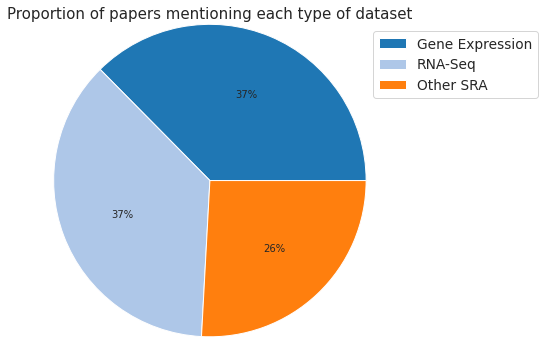

In [11]:
# visualize breakdown of repositories mentioned by papers
sns.set_palette(classes)
# ax = repoCounts_T.plot(kind = 'bar', stacked = True, figsize = (6, 6))
# plt.tick_params(labelbottom = False)
# plt.ylabel("Proportion of papers")
fig, ax = plt.subplots(figsize = (7, 7))
ax.pie(repoCounts["percent"], autopct='%1.f%%')
plt.ylim(0,1)
plt.legend(["Gene Expression", "RNA-Seq", "Other SRA", "Multiple"], bbox_to_anchor = [0.9, 1])
title = "Proportion of papers mentioning each type of dataset"
ax.set_title(title)
plt.savefig("/scratch2/qiushipe/data_reusability/figures/pctMentioningPie.png", dpi = 300, bbox_inches = "tight")

In [12]:
# how many papers reuse, generate
rc = {'class':['generating', 'reusing']}

for c in ["RNA-Seq", "GEO_expr", "SRA_other"]:
    rec = Counter(meta_table.loc[meta_table['class'] == c, :]['reuse_role'])
    reCo = pd.DataFrame.from_dict(rec, orient = 'index').reset_index()
    reCo.columns = ['reuse_role', 'count']
    reCo['percent'] = reCo['count'] / reCo['count'].sum()
    rc[c] = reCo['percent']
    
reuseCounts = pd.DataFrame(rc).T
reuseCounts.columns = reuseCounts.iloc[0,:]
reuseCounts = reuseCounts.iloc[1:,:]
reuseCounts = reuseCounts.sort_values(by = "reusing", ascending = False)
reuseCounts

class,generating,reusing
GEO_expr,0.359687,0.640313
RNA-Seq,0.710948,0.289052
SRA_other,0.744889,0.255111


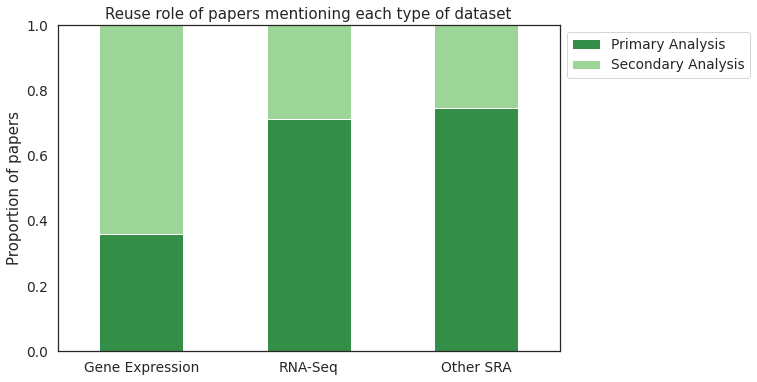

In [13]:
sns.set_palette(prisec)
fig_dims = (9, 6)
ax = reuseCounts.plot(kind = 'bar', stacked = True, figsize = fig_dims)
plt.ylim(0,1)
title = "Reuse role of papers mentioning each type of dataset"
ax.set_title(title)
plt.xticks(ticks = [0, 1, 2], labels = xlabs, rotation = 0)
plt.ylabel("Proportion of papers")
plt.legend(["Primary Analysis", "Secondary Analysis", "Both"], bbox_to_anchor = [1, 1])
plt.savefig("/scratch2/qiushipe/data_reusability/figures/reuseRoleRepos.png", dpi = 300, bbox_inches = "tight")

# visualize reuse and repository distribution across the years

In [14]:
# add year column
fmt = '%Y-%m-%d'
meta_table.loc[:,'pmc_date'] = pd.to_datetime(meta_table['pmc_date'], format = fmt)
meta_table['year'] = meta_table['pmc_date'].dt.year

In [15]:
# get repository counts per date
repo_byDate = meta_table.groupby(['year', 'class'])['class'].count().to_frame(name = 'repo_count').reset_index()

In [16]:
dropme = repo_byDate[repo_byDate['year'] == 2022].index
repo_byDate.drop(dropme, inplace = True)

years = repo_byDate['year'].drop_duplicates().to_list()
years = [int(i) for i in years]

In [17]:
z = {'year':years, 'repository':'GEO', 'repo_count':0}
z2 = {'year':years, 'repository':'SRA', 'repo_count':0}
z3 = {'year':years, 'repository':'Multiple', 'repo_count':0}

zerosGEO = pd.DataFrame(data = z)
zerosSRA = pd.DataFrame(data = z2)
zerosBoth = pd.DataFrame(data = z3)

gexp_byDate = repo_byDate.loc[repo_byDate['class'] == "GEO_expr", :].append(zerosGEO).groupby(['year'], sort = False).sum().reset_index().cumsum()
rnaseq_byDate = repo_byDate.loc[repo_byDate['class'] == "RNA-Seq", :].append(zerosGEO).groupby(['year'], sort = False).sum().reset_index().cumsum()
sra_byDate = repo_byDate.loc[repo_byDate['class'] == "SRA_other", :].append(zerosSRA).groupby(['year'], sort = False).sum().reset_index().cumsum()
mult_byDate = repo_byDate.loc[repo_byDate['class'] == "Multiple", :].append(zerosBoth).groupby(['year'], sort = False).sum().reset_index().cumsum()

/tmp/SLURM_14544042/ipykernel_5172/2837116174.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gexp_byDate = repo_byDate.loc[repo_byDate['class'] == "GEO_expr", :].append(zerosGEO).groupby(['year'], sort = False).sum().reset_index().cumsum()
/tmp/SLURM_14544042/ipykernel_5172/2837116174.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rnaseq_byDate = repo_byDate.loc[repo_byDate['class'] == "RNA-Seq", :].append(zerosGEO).groupby(['year'], sort = False).sum().reset_index().cumsum()
/tmp/SLURM_14544042/ipykernel_5172/2837116174.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sra_byDate = repo_byDate.loc[repo_byDate['class'] == "SRA_other", :].append(zerosSRA).groupby(['year'], sort = False).sum().reset_index().cums

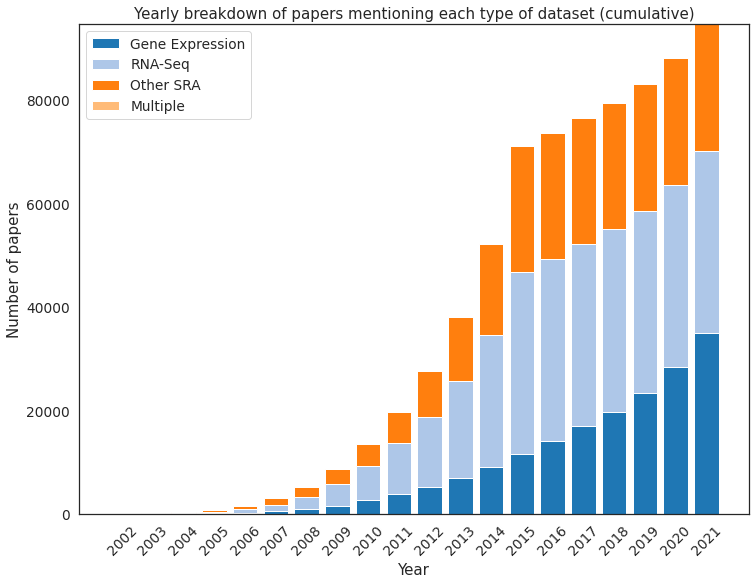

In [18]:
sns.set_palette(classes)
fig, ax = plt.subplots(figsize = (12, 9))

plt.bar(years, gexp_byDate['repo_count'])
plt.bar(years, rnaseq_byDate['repo_count'], bottom = gexp_byDate['repo_count'])
plt.bar(years, sra_byDate['repo_count'], bottom = [i+j for i, j in zip(gexp_byDate['repo_count'], rnaseq_byDate['repo_count'])])
plt.bar(years, mult_byDate['repo_count'], bottom = [i+j+k for i, j, k in zip(gexp_byDate['repo_count'], rnaseq_byDate['repo_count'], sra_byDate['repo_count'])])

plt.xticks(ticks = years, rotation = 45)
title = "Yearly breakdown of papers mentioning each type of dataset (cumulative)"
plt.title(title)
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.legend(["Gene Expression", "RNA-Seq", "Other SRA", "Multiple"], loc = 'upper left')
plt.savefig("/scratch2/qiushipe/data_reusability/figures/repoTimeSer.png", dpi = 300, bbox_inches = "tight")
plt.show()

/tmp/SLURM_14544042/ipykernel_5172/2685103810.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  R_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'R', :].append(zerosG).groupby(['year']).sum().reset_index().cumsum()
/tmp/SLURM_14544042/ipykernel_5172/2685103810.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  G_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'G', :].append(zerosR).groupby(['year']).sum().reset_index().cumsum()
/tmp/SLURM_14544042/ipykernel_5172/2685103810.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bothReuse_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'Multiple', :].append(zerosBoth).groupby(['year']).sum().reset_index().cumsum()


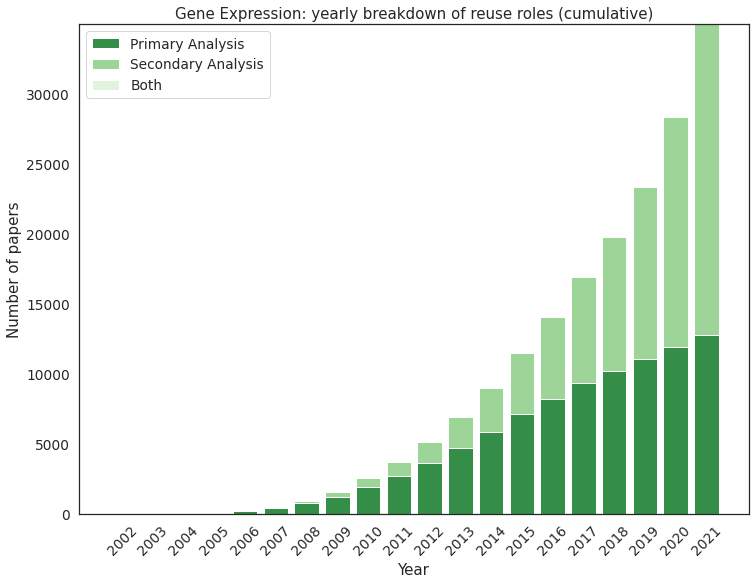

/tmp/SLURM_14544042/ipykernel_5172/2685103810.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  R_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'R', :].append(zerosG).groupby(['year']).sum().reset_index().cumsum()
/tmp/SLURM_14544042/ipykernel_5172/2685103810.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  G_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'G', :].append(zerosR).groupby(['year']).sum().reset_index().cumsum()
/tmp/SLURM_14544042/ipykernel_5172/2685103810.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bothReuse_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'Multiple', :].append(zerosBoth).groupby(['year']).sum().reset_index().cumsum()


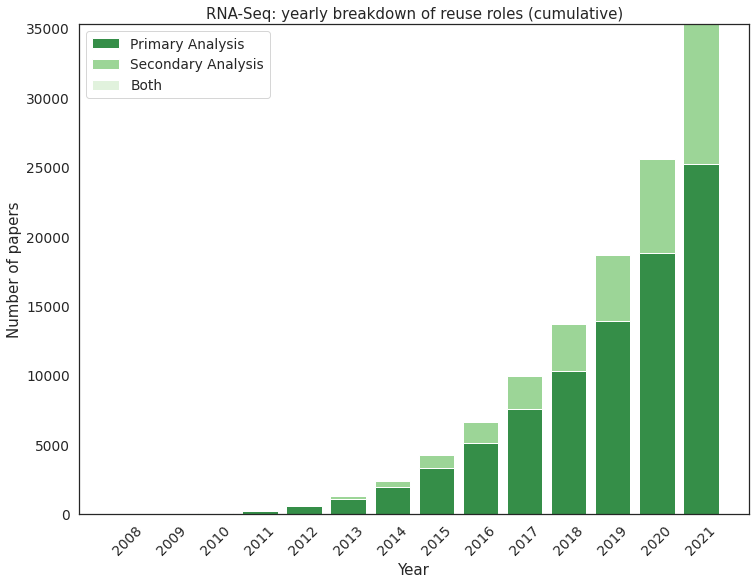

/tmp/SLURM_14544042/ipykernel_5172/2685103810.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  R_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'R', :].append(zerosG).groupby(['year']).sum().reset_index().cumsum()
/tmp/SLURM_14544042/ipykernel_5172/2685103810.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  G_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'G', :].append(zerosR).groupby(['year']).sum().reset_index().cumsum()
/tmp/SLURM_14544042/ipykernel_5172/2685103810.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bothReuse_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'Multiple', :].append(zerosBoth).groupby(['year']).sum().reset_index().cumsum()


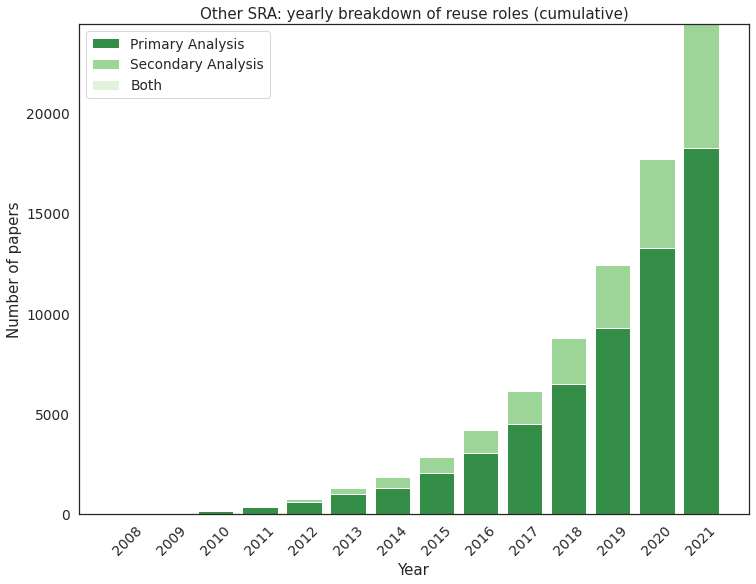

In [19]:
# get reuse counts per date

# CUMULATIVE
reuse_byDateGEOexpr = meta_table.loc[meta_table['class'] == 'GEO_expr', :].groupby(['year', 'reuse_role'])['reuse_role'].count().to_frame(name = 'reuse_count').reset_index()
reuse_byDateRNAseq = meta_table.loc[meta_table['class'] == 'RNA-Seq', :].groupby(['year', 'reuse_role'])['reuse_role'].count().to_frame(name = 'reuse_count').reset_index()
reuse_byDateSRAother = meta_table.loc[meta_table['class'] == 'SRA_other', :].groupby(['year', 'reuse_role'])['reuse_role'].count().to_frame(name = 'reuse_count').reset_index()

timesthru = 0
sns.set_palette(prisec)
for reuse_byDate in [reuse_byDateGEOexpr, reuse_byDateRNAseq, reuse_byDateSRAother]:
    
    dropme = reuse_byDate[reuse_byDate['year'] == 2022].index
    reuse_byDate.drop(dropme, inplace = True)

    years = reuse_byDate['year'].drop_duplicates().to_list()

    z = {'year':years, 'reuse_role':'G', 'reuse_count':0}
    z2 = {'year':years, 'reuse_role':'R', 'reuse_count':0}
    z3 = {'year':years, 'reuse_role':'Multiple', 'reuse_count':0}

    zerosG = pd.DataFrame(data = z)
    zerosR = pd.DataFrame(data = z2)
    zerosBoth = pd.DataFrame(data = z3)

    R_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'R', :].append(zerosG).groupby(['year']).sum().reset_index().cumsum()
    G_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'G', :].append(zerosR).groupby(['year']).sum().reset_index().cumsum()
    bothReuse_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'Multiple', :].append(zerosBoth).groupby(['year']).sum().reset_index().cumsum()

    fig, ax = plt.subplots(figsize = (12, 9))

    plt.bar(years, G_byDate['reuse_count'])
    plt.bar(years, R_byDate['reuse_count'], 
            bottom = G_byDate['reuse_count'])
    plt.bar(years, bothReuse_byDate['reuse_count'], 
            bottom = [i+j for i, j in zip(G_byDate['reuse_count'], R_byDate['reuse_count'])])

    if timesthru == 0:
        cls = "Gene Expression"
    elif timesthru == 1:
        cls = "RNA-Seq"
    elif timesthru == 2:
        cls = "Other SRA"
    timesthru = timesthru + 1
        
    plt.xticks(ticks = years, rotation = 45)
    title = str(cls) + ": yearly breakdown of reuse roles (cumulative)"
    plt.title(title)
    plt.legend(["Primary Analysis", "Secondary Analysis", "Both"], loc = 'upper left')
    plt.xlabel("Year")
    plt.ylabel("Number of papers")
    filename = "/scratch2/qiushipe/data_reusability/figures/cumTimeSer_" + cls + ".png"
    plt.savefig(filename, dpi = 300, bbox_inches = "tight")
    plt.show()

/tmp/SLURM_14544042/ipykernel_5172/721217996.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  R_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'R', :].append(zerosG).groupby(['year']).sum().reset_index()
/tmp/SLURM_14544042/ipykernel_5172/721217996.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  G_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'G', :].append(zerosR).groupby(['year']).sum().reset_index()


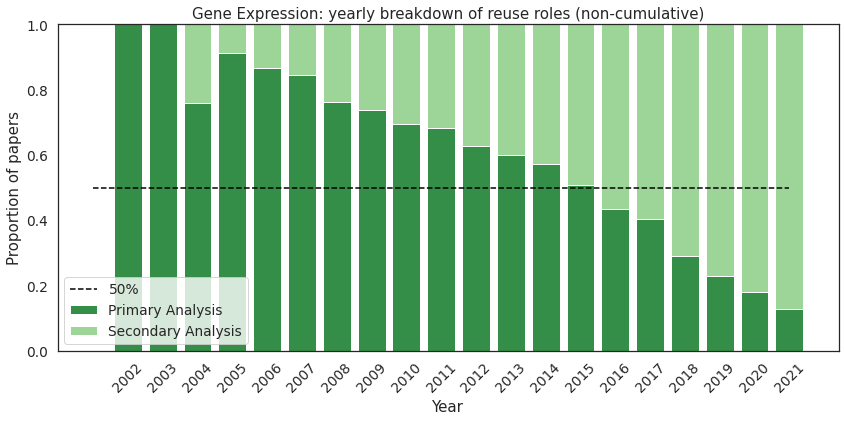

/tmp/SLURM_14544042/ipykernel_5172/721217996.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  R_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'R', :].append(zerosG).groupby(['year']).sum().reset_index()
/tmp/SLURM_14544042/ipykernel_5172/721217996.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  G_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'G', :].append(zerosR).groupby(['year']).sum().reset_index()


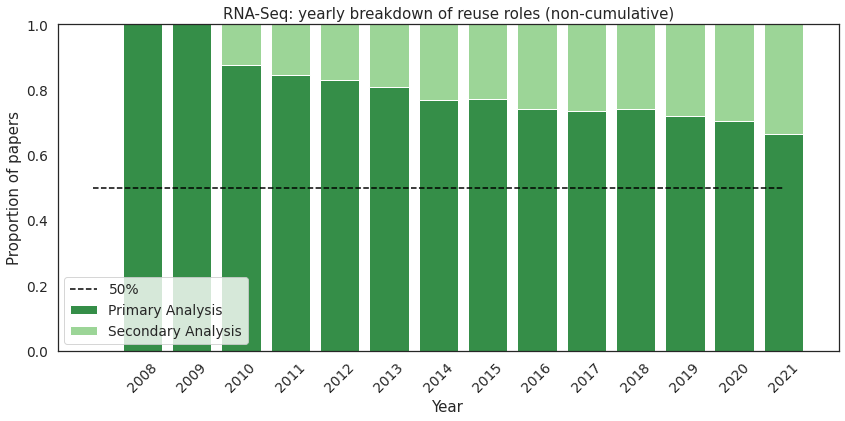

/tmp/SLURM_14544042/ipykernel_5172/721217996.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  R_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'R', :].append(zerosG).groupby(['year']).sum().reset_index()
/tmp/SLURM_14544042/ipykernel_5172/721217996.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  G_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'G', :].append(zerosR).groupby(['year']).sum().reset_index()


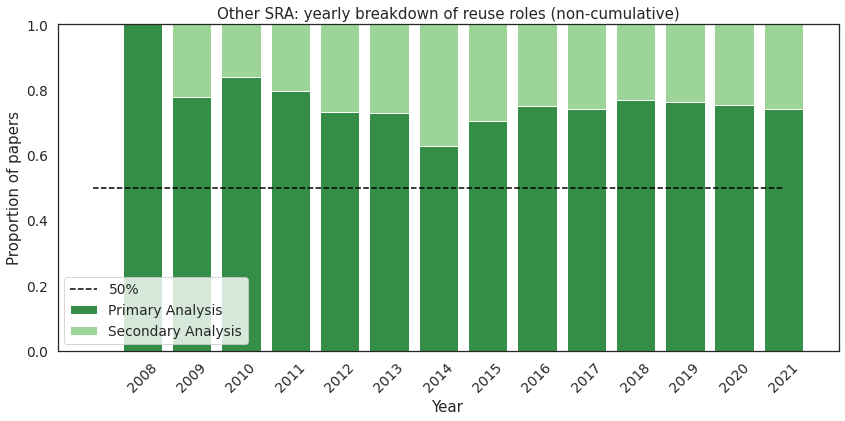

In [20]:
# NON-CUMULATIVE
timesthru = 0
sns.set_palette(prisec)
for reuse_byDate in [reuse_byDateGEOexpr, reuse_byDateRNAseq, reuse_byDateSRAother]:
    
    dropme = reuse_byDate[reuse_byDate['year'] == 2022].index
    reuse_byDate.drop(dropme, inplace = True)

    years = reuse_byDate['year'].drop_duplicates().to_list()

    z = {'year':years, 'reuse_role':'G', 'reuse_count':0}
    z2 = {'year':years, 'reuse_role':'R', 'reuse_count':0}

    zerosG = pd.DataFrame(data = z)
    zerosR = pd.DataFrame(data = z2)

    R_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'R', :].append(zerosG).groupby(['year']).sum().reset_index()
    G_byDate = reuse_byDate.loc[reuse_byDate['reuse_role'] == 'G', :].append(zerosR).groupby(['year']).sum().reset_index()
    
    fig, ax = plt.subplots(figsize = (14, 6))
    
    total_counts = G_byDate['reuse_count'] + R_byDate['reuse_count'] # + bothReuse_byDate['reuse_count']
    plt.bar(years, G_byDate['reuse_count'] / total_counts)
    plt.bar(years, R_byDate['reuse_count'] / total_counts, 
            bottom = G_byDate['reuse_count'] / total_counts)
    
    if timesthru == 0:
        cls = "Gene Expression"
        plt.plot([2001, 2021], [0.5, 0.5], '--', color = 'black')
    elif timesthru == 1:
        cls = "RNA-Seq"
        plt.plot([2007, 2021], [0.5, 0.5], '--', color = 'black')
    elif timesthru == 2:
        cls = "Other SRA"
        plt.plot([2007, 2021], [0.5, 0.5], '--', color = 'black')
    timesthru = timesthru + 1
    
    plt.rc('font', size = 18)
    plt.xticks(ticks = years, rotation = 45)
    title = str(cls) + ": yearly breakdown of reuse roles (non-cumulative)"
    plt.title(title)
    plt.legend(["50%", "Primary Analysis", "Secondary Analysis"], loc = 'lower left')
    plt.xlabel("Year")
    plt.ylabel("Proportion of papers")    
    filename = "/scratch2/qiushipe/data_reusability/figures/nonCumTimeSer_" + cls + ".png"
    plt.savefig(filename, dpi = 300, bbox_inches = "tight")
    plt.show()
        
plt.rc('font', size = 12)

In [21]:
# remove papers with 'Multiple' listed for either repository or reuse_role
meta_table = meta_table.loc[meta_table['repository'] != 'Multiple', :].loc[meta_table['reuse_role'] != 'Multiple', :]

# Visualize by dataset

In [22]:
# how many times is each dataset used?
prim_table = pd.read_csv(r'/scratch1/qiushipe/data_reusability/data_tables/metadataMatrix_filtered.csv')
accs = prim_table[['converted_accession', 'repository', 'sec_use_count', 'norm_reuse_count', 'time_public', 'class']].drop_duplicates()

In [23]:
# what percentage of datasets are used more than once (re-used at least once)?
accs['wasReused'] = accs['sec_use_count'] * accs['time_public'] >= 1
accsPcts = accs.groupby('class', as_index = False).agg({'wasReused':'mean'})
accsPcts = accsPcts.rename(columns = {'wasReused':'pctReused'})

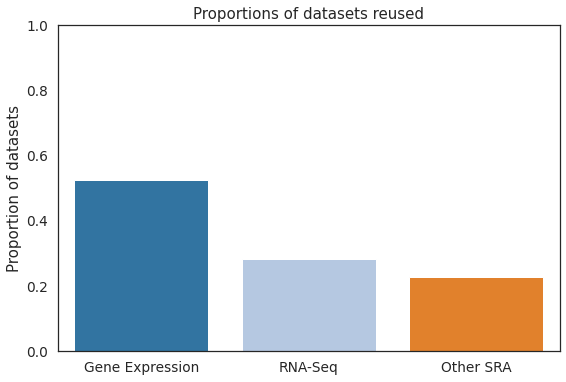

In [24]:
# plot barplot showing percentage of datasets reused in GEO and SRA
sns.set_palette(classes)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data = accsPcts, x = 'class', y = 'pctReused', ax = ax)
plt.ylim(0,1)
title = "Proportions of datasets reused"
ax.set_title(title)
plt.xticks(ticks = [0, 1, 2], labels = xlabs)
plt.xlabel("")
plt.ylabel("Proportion of datasets")
plt.savefig("/scratch2/qiushipe/data_reusability/figures/pctDataReused.png", dpi = 300, bbox_inches = "tight")
plt.show()

In [25]:
# plot distribution of reuse for each unique dataset, first using a boxplot
# each point is a dataset

# remove datasets not reused at all
accs_filt = accs.loc[accs['sec_use_count'] > 0, :]

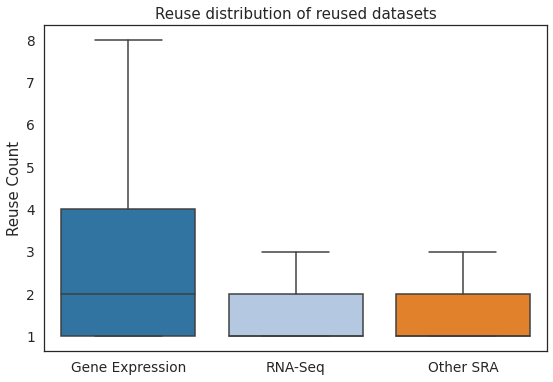

In [26]:
sns.set_palette(classes)
fig, ax = plt.subplots(figsize=fig_dims)
datasets_box = sns.boxplot(data = accs_filt, x = 'class', y = 'sec_use_count', showfliers = False, ax = ax,
                          order = ["GEO_expr", "RNA-Seq", "SRA_other"])
# datasets_box = sns.boxenplot(data = accs_filt, x = 'class', y = 'reuse_count', ax = ax,
#                             order = ["GEO_expr", "RNA-Seq", "SRA_other"], showfliers = False)
# datasets_box.set(yscale = 'log')
title = "Reuse distribution of reused datasets"
ax.set_title(title)
plt.xticks(ticks = [0, 1, 2], labels = xlabs)
plt.xlabel("")
plt.ylabel("Reuse Count")
plt.savefig("/scratch2/qiushipe/data_reusability/figures/reuseDistRepos.png", dpi = 300, bbox_inches = "tight")
plt.show()

In [27]:
sraMean = statistics.mean(accs_filt.loc[accs_filt['class'] == "SRA_other"]['sec_use_count'])
gexpMean = statistics.mean(accs_filt.loc[accs_filt['class'] == "GEO_expr"]['sec_use_count'])
rnaseqMean = statistics.mean(accs_filt.loc[accs_filt['class'] == "RNA-Seq"]['sec_use_count'])
print("SRA mean reuse count is " + str(sraMean))
print("RNA-Seq mean reuse count is " + str(rnaseqMean))
print("Gene expression mean reuse count is " + str(gexpMean))

sraMed = statistics.median(accs_filt.loc[accs_filt['class'] == "SRA_other"]['sec_use_count'])
gexpMed = statistics.median(accs_filt.loc[accs_filt['class'] == "GEO_expr"]['sec_use_count'])
rnaseqMed = statistics.median(accs_filt.loc[accs_filt['class'] == "RNA-Seq"]['sec_use_count'])
print("SRA median reuse count is " + str(sraMed))
print("RNA-Seq median reuse count is " + str(rnaseqMed))
print("Gene expression median reuse count is " + str(gexpMed))

SRA mean reuse count is 2.1303348653972423
RNA-Seq mean reuse count is 2.5491848832901076
Gene expression mean reuse count is 6.610503802281369
SRA median reuse count is 1.0
RNA-Seq median reuse count is 1.0
Gene expression median reuse count is 2.0


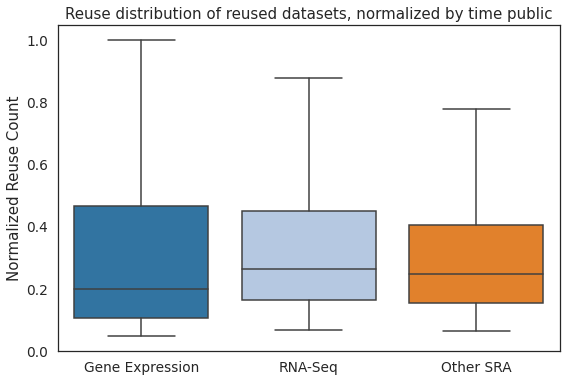

In [28]:
# plot the distribution of reuse for each dataset, normalized by time public
sns.set_palette(classes)
fig, ax = plt.subplots(figsize=fig_dims)
datasets_box = sns.boxplot(data = accs_filt, x = 'class', y = 'norm_reuse_count', showfliers = False, ax = ax,
                          order = ["GEO_expr", "RNA-Seq", "SRA_other"])
# datasets_box = sns.boxenplot(data = accs_filt, x = 'class', y = 'norm_reuse_count', ax = ax,
#                             order = ["GEO_expr", "RNA-Seq", "SRA_other"])
# datasets_box.set(yscale = 'log')
title = "Reuse distribution of reused datasets, normalized by time public"
ax.set_title(title)
plt.xticks(ticks = [0, 1, 2], labels = xlabs)
plt.xlabel("")
plt.ylabel("Normalized Reuse Count")
plt.savefig("/scratch2/qiushipe/data_reusability/figures/reuseDistRepos_norm.png", dpi = 300, bbox_inches = "tight")
plt.show()

## Visualize by feature

In [29]:
table_filt = pd.merge(meta_table, prim_table, how = 'left', on = ['pmc_ID', 'repository', 'reuse_role', 'class'])

In [30]:
accs_feat = table_filt.drop(labels = ['pmc_ID', 'accession', 'pmc_date_x', 'converted_accession_y', 'time_public_y', 'sec_use_count_y', 'norm_reuse_count_y', 'library_strategy_y'], axis = 1).drop_duplicates()
accs_feat = accs_feat.rename(columns = {'pmc_date_y' : 'pmc_date', 'converted_accession_x' : 'converted_accession', 'time_public_x' : 'time_public', 'sec_use_count_x' : 'sec_use_count', 'norm_reuse_count_x' : 'norm_reuse_count', 'library_strategy_x' : 'library_strategy'})

In [31]:
def inList(pot_vec, ref_vec):
    bools = []
    for i in pot_vec:
        if(type(i) == str):
            if(i in ref_vec):
                bools.append(True)
            else:
                bools.append(False)
        else:
            bools.append(False)
    return bools

In [32]:
# plot reuse per species

sc = Counter(accs_feat['species'])

specCounts = pd.DataFrame.from_dict(sc, orient = 'index').reset_index()
specCounts.columns = ['species', 'count']

accs_feat['is_human'] = accs_feat['species'] == 'Homo sapiens'

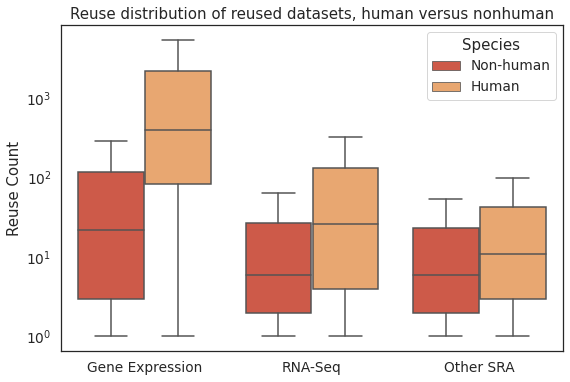

In [33]:
sns.set_palette(others)
fig, ax = plt.subplots(figsize=fig_dims)
# sns.boxenplot(data = accs_feat.loc[accs_feat['reuse_count'] > 0, :], 
#               x = 'class', y = 'reuse_count', hue = 'is_human', ax = ax).set(yscale = 'log')
sns.boxplot(data = accs_feat.loc[accs_feat['sec_use_count'] > 0, :], 
            x = 'class', y = 'sec_use_count', hue = 'is_human', showfliers = False, ax = ax,
            order = ["GEO_expr", "RNA-Seq", "SRA_other"]).set(yscale = 'log')
title = "Reuse distribution of reused datasets, human versus nonhuman"
ax.set_title(title)
plt.xticks(ticks = [0, 1, 2], labels = xlabs)
plt.xlabel("")
plt.ylabel("Reuse Count")
h, l = ax.get_legend_handles_labels()
plt.legend(handles = h, labels = ["Non-human", "Human"], title = "Species")
plt.savefig("/scratch2/qiushipe/data_reusability/figures/reuseDistHuman.png", dpi = 300, bbox_inches = "tight")
plt.show()

In [34]:
accs_feat_filt = accs_feat.loc[accs_feat['sec_use_count'] > 0, :]
accs_feat_filtGEO = accs_feat_filt.loc[accs_feat_filt['repository'] == 'GEO', :]
accs_feat_filtSRA = accs_feat_filt.loc[accs_feat_filt['repository'] == 'SRA', :]

scipy.stats.ttest_ind(a = accs_feat_filtGEO.loc[accs_feat_filtGEO['is_human'] == True, :]['sec_use_count'],
                     b = accs_feat_filtGEO.loc[accs_feat_filtGEO['is_human'] == False, :]['sec_use_count'],
                     equal_var = False)
scipy.stats.ttest_ind(a = accs_feat_filtSRA.loc[accs_feat_filtSRA['is_human'] == True, :]['sec_use_count'],
                     b = accs_feat_filtSRA.loc[accs_feat_filtSRA['is_human'] == False, :]['sec_use_count'],
                     equal_var = False)

Ttest_indResult(statistic=4.043676844331713, pvalue=5.401271521133222e-05)

In [35]:
# plot RI distribution for species with most amount of datasets which are present in all 3 categories
# get the columns we want and group on species
specCounts = accs_feat[['converted_accession', 'species', 'class']].drop_duplicates()
specCounts = specCounts.groupby(['species'], as_index = False).agg({'converted_accession':'nunique',
                                                   'class':'nunique'})
specCounts.columns = ['species', 'acc_count', 'class_count']
# filter out species with datasets in less than all 3 categories
specCounts = specCounts.loc[specCounts['class_count'] > 2, :]
specCounts = specCounts.dropna().sort_values(by = 'acc_count', ascending = False)

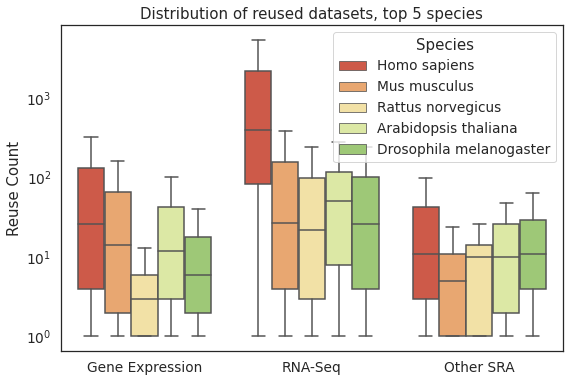

In [36]:
NUM_TOPSPECIES = 5

topSpec = specCounts.head(n = NUM_TOPSPECIES)['species'].to_list()
            
accs_top_spec = accs_feat.loc[inList(accs_feat['species'], topSpec), :].sort_values(by = 'sec_use_count', ascending = False)

sns.set_palette(others)
fig, ax = plt.subplots(figsize=fig_dims)
s = sns.boxplot(data = accs_top_spec.loc[accs_top_spec['sec_use_count'] > 0, :], 
                x = 'class', y = 'sec_use_count', hue = 'species', showfliers = False, ax = ax)
s.set(yscale = 'log')
# add_stat_annotation(data = accs_top_spec.loc[accs_top_spec['reuse_count'] > 0, :],
#                    x = 'species', y = 'reuse_count',
#                     box_pairs = [(("Homo sapiens", "GEO"), ("Homo sapiens"), ("SRA"))], test = 't-test_ind', ax = ax)
s.set_xticklabels(s.get_xticklabels(), rotation = 45)
title = "Distribution of reused datasets, top " + str(NUM_TOPSPECIES) + " species"
ax.set_title(title)
plt.legend(title = "Species")
plt.xticks(ticks = [0, 1, 2], labels = xlabs, rotation = 0)
plt.xlabel("")
plt.ylabel("Reuse Count")
plt.savefig("/scratch2/qiushipe/data_reusability/figures/speciesDistHUE.png", dpi = 300, bbox_inches = "tight")
plt.show()

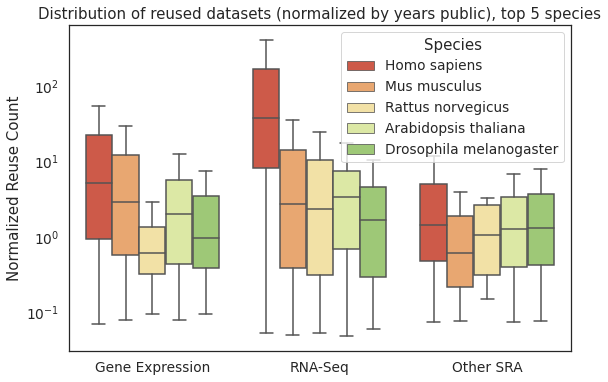

In [37]:
# plot reuse distribution for top 10 species, NRI

sns.set_palette(others)
fig, ax = plt.subplots(figsize=fig_dims)
s = sns.boxplot(data = accs_top_spec.loc[accs_top_spec['sec_use_count'] > 0, :], 
                x = 'class', y = 'norm_reuse_count', hue = 'species', showfliers = False, ax = ax)
s.set(yscale = 'log')
# add_stat_annotation(data = accs_top_spec.loc[accs_top_spec['reuse_count'] > 0, :],
#                    x = 'species', y = 'reuse_count',
#                     box_pairs = [(("Homo sapiens", "GEO"), ("Homo sapiens"), ("SRA"))], test = 't-test_ind', ax = ax)
s.set_xticklabels(s.get_xticklabels(), rotation = 45)
title = "Distribution of reused datasets (normalized by years public), top " + str(NUM_TOPSPECIES) + " species"
ax.set_title(title)
h, l = ax.get_legend_handles_labels()
plt.legend(title = "Species")
plt.xticks(ticks = [0, 1, 2], labels = xlabs, rotation = 0)
plt.xlabel("")
plt.ylabel("Normalized Reuse Count")
plt.savefig("/scratch2/qiushipe/data_reusability/figures/speciesDistHUE_NRI.png", dpi = 300, bbox_inches = "tight")
plt.show()

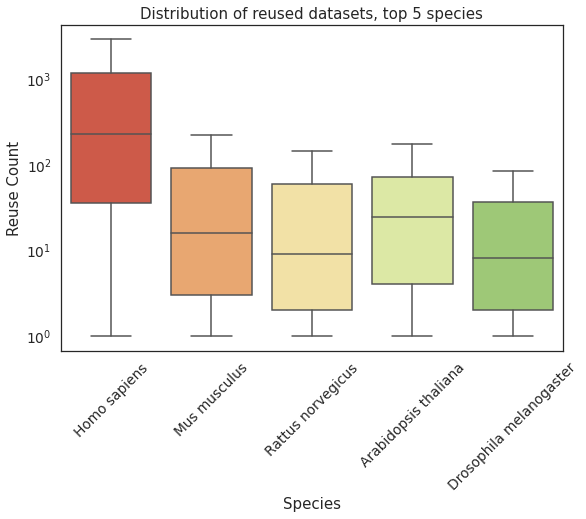

In [38]:
# plot species plot without the group hue, RI
sns.set_palette(others)
fig, ax = plt.subplots(figsize=fig_dims)
s = sns.boxplot(data = accs_top_spec.loc[accs_top_spec['sec_use_count'] > 0, :], 
                x = 'species', y = 'sec_use_count', showfliers = False, ax = ax)
s.set(yscale = 'log')
s.set_xticklabels(s.get_xticklabels(), rotation = 45)
title = "Distribution of reused datasets, top " + str(NUM_TOPSPECIES) + " species"
ax.set_title(title)
plt.xlabel("Species")
plt.ylabel("Reuse Count")
plt.savefig("/scratch2/qiushipe/data_reusability/figures/speciesDist.png", dpi = 300, bbox_inches = "tight")
plt.show()

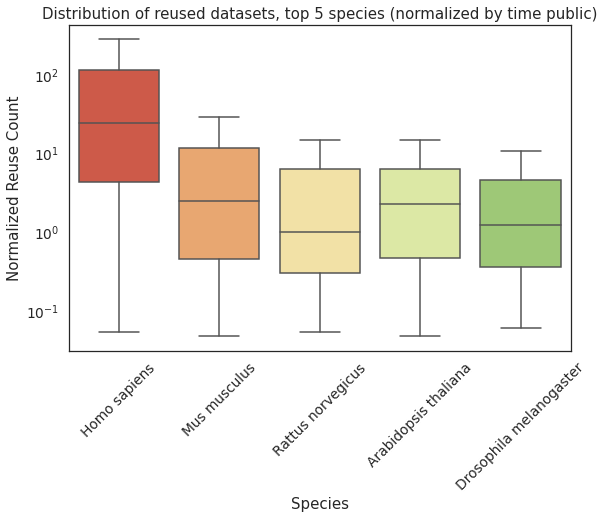

In [39]:
# plot species plot without the group hue, NRI
sns.set_palette(others)
fig, ax = plt.subplots(figsize=fig_dims)
s = sns.boxplot(data = accs_top_spec.loc[accs_top_spec['sec_use_count'] > 0, :], 
                x = 'species', y = 'norm_reuse_count', showfliers = False, ax = ax)
s.set(yscale = 'log')
s.set_xticklabels(s.get_xticklabels(), rotation = 45)
title = "Distribution of reused datasets, top " + str(NUM_TOPSPECIES) + " species (normalized by time public)"
ax.set_title(title)
plt.xlabel("Species")
plt.ylabel("Normalized Reuse Count")
plt.savefig("/scratch2/qiushipe/data_reusability/figures/speciesDist_NRI.png", dpi = 300, bbox_inches = "tight")
plt.show()

In [40]:
# plot reuse per library strategy in SRA

lc = Counter(accs_feat.loc[accs_feat['repository'] == "SRA", :]['library_strategy'])

libCounts = pd.DataFrame.from_dict(lc, orient = 'index').reset_index()
libCounts.columns = ['library_strategy', 'count']
# print(specCounts.head(n = 20))

NUM_TOPLIBS = 10

topLibsSRA = libCounts.dropna().sort_values(by = 'count', ascending = False).head(n = NUM_TOPLIBS)['library_strategy'].to_list()

accs_top_libsSRA = accs_feat.loc[inList(accs_feat['library_strategy'], topLibsSRA), :].sort_values(by = 'sec_use_count', ascending = False)

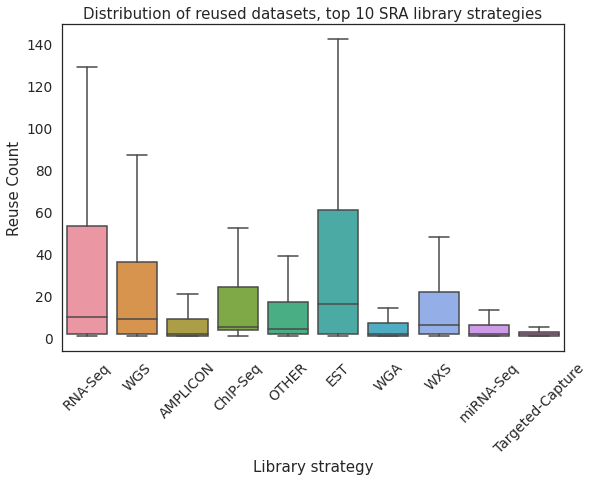

In [41]:
# plot library strategies, RI
sns.set_palette(others)
fig, ax = plt.subplots(figsize=fig_dims)
s = sns.boxplot(data = accs_top_libsSRA.loc[accs_top_libsSRA['sec_use_count'] > 0, :], 
                x = 'library_strategy', y = 'sec_use_count', showfliers = False, ax = ax)
# s.set(yscale = 'log')
s.set_xticklabels(s.get_xticklabels(), rotation = 45)
title = "Distribution of reused datasets, top " + str(NUM_TOPLIBS) + " SRA library strategies"
ax.set_title(title)
plt.xlabel("Library strategy")
plt.ylabel("Reuse Count")
plt.savefig("/scratch2/qiushipe/data_reusability/figures/libstratDist.png", dpi = 300, bbox_inches = "tight")
plt.show()

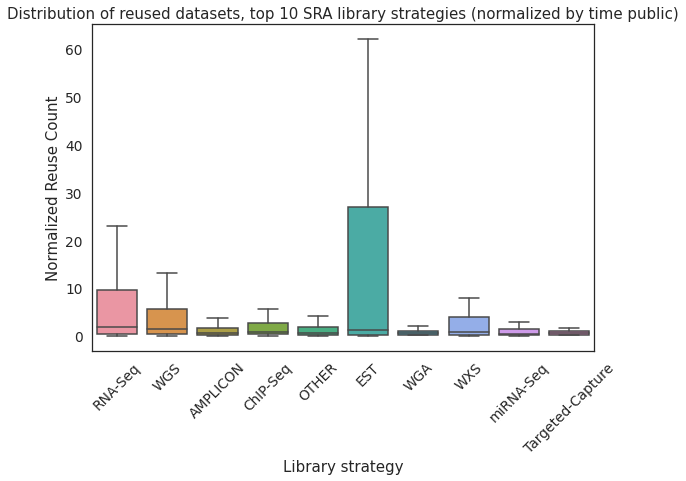

In [42]:
# plot library strategies, NRI
sns.set_palette(others)
fig, ax = plt.subplots(figsize=fig_dims)
s = sns.boxplot(data = accs_top_libsSRA.loc[accs_top_libsSRA['sec_use_count'] > 0, :], 
                x = 'library_strategy', y = 'norm_reuse_count', showfliers = False, ax = ax)
# s.set(yscale = 'log')
s.set_xticklabels(s.get_xticklabels(), rotation = 45)
title = "Distribution of reused datasets, top " + str(NUM_TOPLIBS) + " SRA library strategies (normalized by time public)"
ax.set_title(title)
plt.xlabel("Library strategy")
plt.ylabel("Normalized Reuse Count")
plt.savefig("/scratch2/qiushipe/data_reusability/figures/libstratDist_NRI.png", dpi = 300, bbox_inches = "tight")
plt.show()

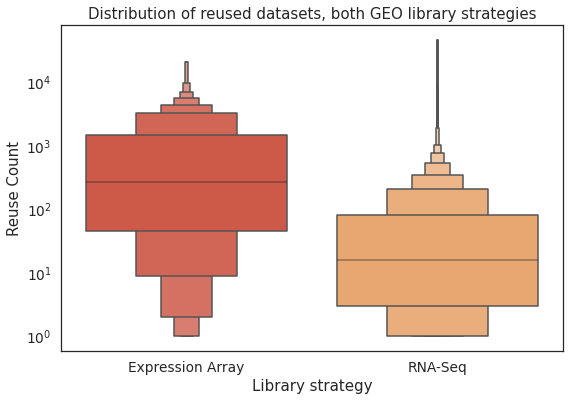

In [43]:
# plot reuse per library strategy in GEO, RI

accs_top_libsGEO = accs_feat.loc[accs_feat['repository'] == 'GEO', :].dropna(axis = 0, subset = ['library_strategy'])
accs_top_libsGEO = accs_top_libsGEO[(accs_top_libsGEO['library_strategy'] == 'Expression_Array') | (accs_top_libsGEO['library_strategy'] == 'RNA-Seq')]

sns.set_palette(others)
fig, ax = plt.subplots(figsize=fig_dims)
s = sns.boxenplot(data = accs_top_libsGEO.loc[accs_top_libsGEO['sec_use_count'] > 0, :], 
                x = 'library_strategy', y = 'sec_use_count', ax = ax, showfliers = False)
s.set(yscale = 'log')
title = 'Distribution of reused datasets, both GEO library strategies'
ax.set_title(title)
plt.xticks([0, 1], ['Expression Array', 'RNA-Seq'])
plt.xlabel('Library strategy')
plt.ylabel('Reuse Count')
plt.savefig('/scratch2/qiushipe/data_reusability/figures/geoLibstratDist.png', dpi = 300, bbox_inches = "tight")
plt.show()

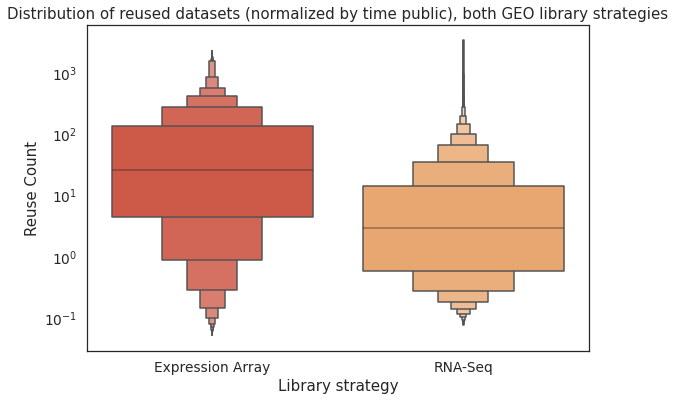

In [44]:
# plot reuse per library strategy in GEO, NRI

accs_top_libsGEO = accs_feat.loc[accs_feat['repository'] == 'GEO', :].dropna(axis = 0, subset = ['library_strategy'])
accs_top_libsGEO = accs_top_libsGEO[(accs_top_libsGEO['library_strategy'] == 'Expression_Array') | (accs_top_libsGEO['library_strategy'] == 'RNA-Seq')]


sns.set_palette(others)
fig, ax = plt.subplots(figsize=fig_dims)
# s = sns.boxplot(data = accs_top_libsGEO.loc[accs_top_libsGEO['reuse_count'] > 0, :], 
#                 x = 'library_strategy', y = 'reuse_count', showfliers = False, ax = ax)
s = sns.boxenplot(data = accs_top_libsGEO.loc[accs_top_libsGEO['sec_use_count'] > 0, :], 
                x = 'library_strategy', y = 'norm_reuse_count', ax = ax, showfliers = False)
s.set(yscale = 'log')
title = "Distribution of reused datasets (normalized by time public), both GEO library strategies"
ax.set_title(title)
plt.xticks([0, 1], ["Expression Array", "RNA-Seq"])
plt.xlabel("Library strategy")
plt.ylabel("Reuse Count")
plt.savefig("/scratch2/qiushipe/data_reusability/figures/geoLibstratDist_NRI.png", dpi = 300, bbox_inches = "tight")
plt.show()

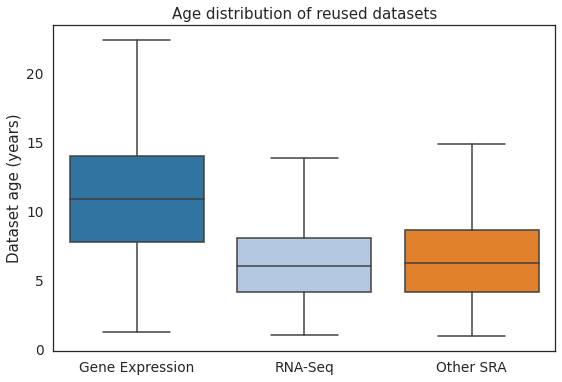

In [45]:
# plot distribution of age of the datasets which were reused at least once

accs_age = accs.loc[accs["wasReused"] == True, :].drop_duplicates()
accs_age

sns.set_palette(classes)
fig, ax = plt.subplots(figsize=fig_dims)
s = sns.boxplot(data = accs_age, x = "class", y = "time_public", ax = ax,
                 order = ["GEO_expr", "RNA-Seq", "SRA_other"], showfliers = False)
title = "Age distribution of reused datasets"
ax.set_title(title)
plt.xticks(ticks = [0, 1, 2], labels = xlabs)
plt.xlabel("")
plt.ylabel("Dataset age (years)")
plt.savefig("/scratch2/qiushipe/data_reusability/figures/ageDistribution.png", dpi = 300, bbox_inches = "tight")
plt.show()

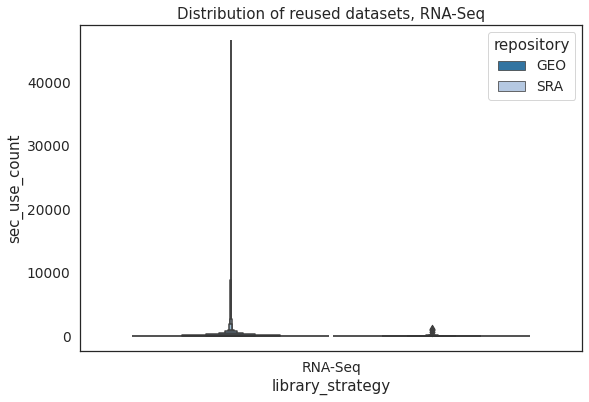

In [46]:
# plot library stragegy overlap between SRA and GEO (RNA-Seq)

accsRS = accs_feat.loc[accs_feat['library_strategy'] == 'RNA-Seq', :]

fig, ax = plt.subplots(figsize=fig_dims)
s = sns.boxenplot(data = accsRS.loc[accsRS['sec_use_count'] > 0, :], 
                 x = 'library_strategy', y = 'sec_use_count', hue = 'repository', ax = ax)
# s.set(yscale = 'log')
title = "Distribution of reused datasets, RNA-Seq"
ax.set_title(title)
plt.show()

In [47]:
# plot reuse per hardware

hc = Counter(accs_feat['hardware'])

hwCounts = pd.DataFrame.from_dict(hc, orient = 'index').reset_index()
hwCounts.columns = ['hardware', 'count']

NUM_TOPHWS = 15

topHws = hwCounts.dropna().sort_values(by = 'count', ascending = False).head(n = NUM_TOPHWS)['hardware'].to_list()

accs_top_hws = accs_feat.loc[inList(accs_feat['hardware'], topHws), :].sort_values(by = 'sec_use_count', ascending = False)


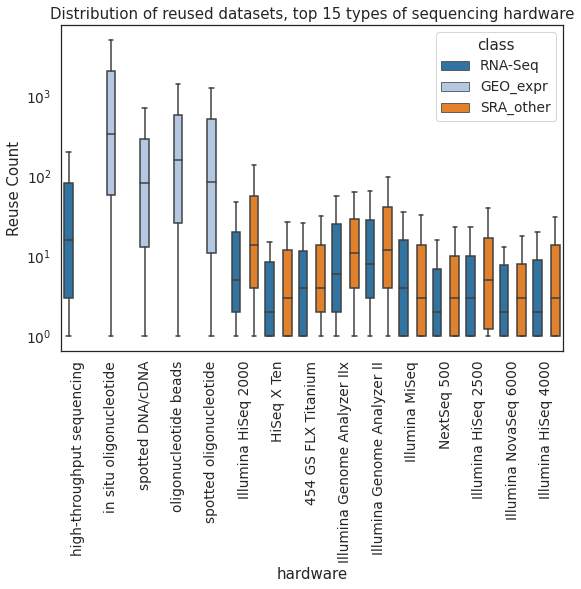

In [48]:
fig, ax = plt.subplots(figsize=fig_dims)
# s = sns.boxenplot(data = accs_top_hws.loc[accs_top_hws['sec_use_count'] > 0, :], x = 'hardware', y = 'reuse_count', hue = 'repository', ax = ax)
s = sns.boxplot(data = accs_top_hws.loc[accs_top_hws['sec_use_count'] > 0, :], 
                x = 'hardware', y = 'sec_use_count', hue = 'class', showfliers = False, ax = ax)
s.set(yscale = 'log')
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
title = "Distribution of reused datasets, top " + str(NUM_TOPHWS) + " types of sequencing hardware"
plt.ylabel("Reuse Count")
ax.set_title(title)
plt.savefig("/scratch2/qiushipe/data_reusability/figures/hardwareDist_RC.png", dpi = 300, bbox_inches = "tight")
plt.show()

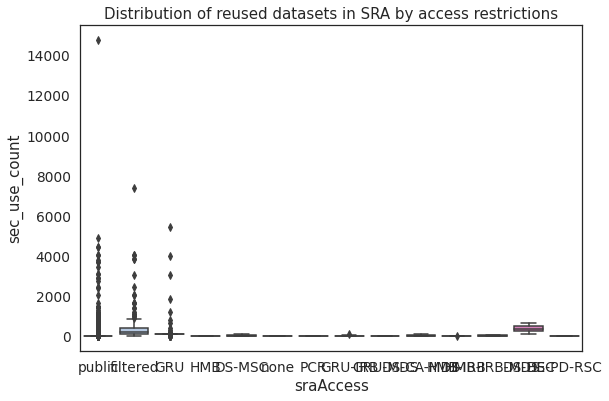

In [49]:
# plot reuse by access restrictions

# Counter(accs_feat.loc[accs_feat['repository'] == 'SRA', :]['sraAccess'])

fig, ax = plt.subplots(figsize=fig_dims)
# sns.boxenplot(data = accs_feat.loc[accs_feat['repository'] == 'SRA', :].loc[accs_feat['sec_use_count'] > 0], x = 'sraAccess', y = 'reuse_count', ax = ax)
sns.boxplot(data = accs_feat.loc[accs_feat['repository'] == 'SRA', :].loc[accs_feat['sec_use_count'] > 0], x = 'sraAccess', y = 'sec_use_count', ax = ax)
s.set(yscale = 'log')
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
title = "Distribution of reused datasets in SRA by access restrictions"
ax.set_title(title)
plt.show()

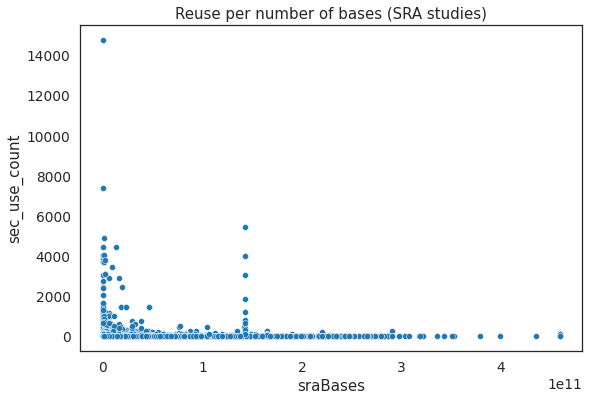

In [50]:
# plot reuse versus sample size

fig, ax = plt.subplots(figsize=fig_dims)
s = sns.scatterplot(data = accs_feat, x = 'sraBases', y = 'sec_use_count')
title = "Reuse per number of bases (SRA studies)"
ax.set_title(title)
plt.show()

In [51]:
# determine the top 10 most reused datasets

NUM_MOSTREUSED = 8

most_reused = accs_feat[['converted_accession', 'sec_use_count']].drop_duplicates().sort_values(by = 'sec_use_count', ascending = False).head(n = NUM_MOSTREUSED)
most_reused

,converted_accession,sec_use_count
52227,GSE17312,46634
18555,GSE7307,22109
147486,GSE21138,20955
62546,SRP022914,14790
80694,GSE2109,14731
86474,GSE2109,13665
2730,GSE96,11550
29260,GSE31477;GSE51334,11294


In [52]:
m_table = pd.read_csv(r'/scratch1/qiushipe/data_reusability/data_tables/metadataMatrix_filtered.csv')

In [53]:
# get the top 50 most reused datasets in each category
NUM_MOSTREUSED2 = 50

for j in ["sec_use_count", "norm_reuse_count"]:
    for i in ["GEO_expr", "RNA-Seq", "SRA_other"]:
        most_reused2 = m_table.loc[m_table['class'] == i, :][['converted_accession', j]].drop_duplicates().sort_values(by = j, ascending = False).head(n = NUM_MOSTREUSED2)
        most_reused_paps = meta_table.loc[inList(meta_table["converted_accession"], most_reused2["converted_accession"].to_list()), :]
        filename = "/scratch1/qiushipe/data_reusability/data_tables/top" + str(NUM_MOSTREUSED2) + "datasets_" + i + "_" + j + ".csv"
        most_reused_paps.to_csv(filename, index = False)

In [54]:
# plot the trajectory of the reuse of some of the most reused datasets through time
# set up the dataframe
df_ds = m_table
df_ds.loc[:, "pmc_year"] = pd.to_datetime(m_table["pmc_date"]).dt.year
df_ds = df_ds[["converted_accession", "pmc_year", "pmc_date"]]
df_ds = df_ds.groupby(["pmc_year", "converted_accession"], as_index = False).count()
df_ds.columns = ["pmc_year", "converted_accession", "number_of_reuses"]
topds = most_reused["converted_accession"].to_list()
df_ds = df_ds.loc[inList(df_ds["converted_accession"], topds), :]
df_ds = df_ds.loc[df_ds["pmc_year"] != 2022, :]
# df_ds

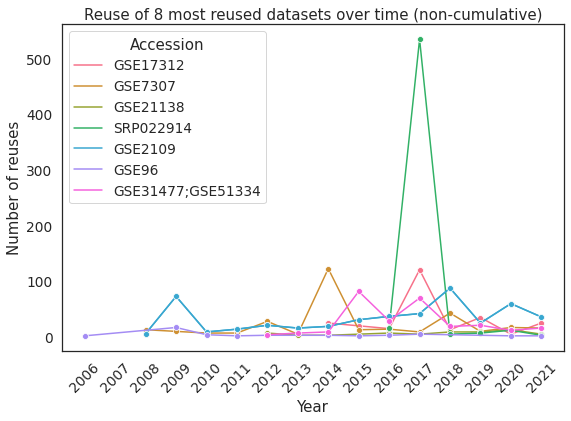

In [55]:
# plot the data on one set of axes
sns.set_palette(others)
years = df_ds['pmc_year'].drop_duplicates().to_list()
years = [int(i) for i in years]
fig, ax = plt.subplots(figsize=fig_dims)
s = sns.lineplot(data = df_ds, x = "pmc_year", y = "number_of_reuses", hue = "converted_accession", 
                 hue_order = most_reused["converted_accession"].to_list(), marker = 'o', ax = ax)
plt.xticks(ticks = list(range(2006,2022,1)), rotation = 45)
title = "Reuse of " + str(NUM_MOSTREUSED) + " most reused datasets over time (non-cumulative)"
ax.set_title(title)
['','','','','']
plt.legend(title = "Accession")
plt.xlabel("Year")
plt.ylabel("Number of reuses")
plt.savefig("/scratch2/qiushipe/data_reusability/figures/reuseOverTime_mostReusedDatasets.png", dpi = 300, bbox_inches = "tight")
plt.show()

In [56]:
# show the rank of secondary analysis publications
reuse_rank = meta_table[meta_table.reuse_role.isin(['R'])].groupby(by = ['country'], as_index = False).\
agg({'reuse_role': lambda x: len(x)}).rename(columns = {'reuse_role': 'secondary_count'}).sort_values(by ='secondary_count', ascending = False).reset_index(drop = True)
reuse_rank

,country,secondary_count
0,China,17155
1,United States,9880
2,United Kingdom,2001
3,Germany,1883
4,Japan,1223
...,...,...
80,Ukraine,1
81,Bhutan,1
82,Latvia,1
83,Armenia,1


In [57]:
# show the rank of primary analysis publications
generate_rank = meta_table[meta_table.reuse_role.isin(['G'])].groupby(by = ['country'], as_index = False).\
agg({'reuse_role': lambda x: len(x)}).rename(columns = {'reuse_role': 'primary_count'}).sort_values(by ='primary_count', ascending = False).reset_index(drop = True)
generate_rank

,country,primary_count
0,United States,19247
1,China,12270
2,Germany,3545
3,United Kingdom,3135
4,Japan,3097
...,...,...
87,Benin,1
88,Bahrain,1
89,Vanuatu,1
90,Azerbaijan,1


In [58]:
# count secondary analysis and primary analysis for each country
reuse_table = pd.merge(reuse_rank, generate_rank, on = 'country', how = 'outer').fillna(0)
reuse_table.loc[:, 'total_count'] = reuse_table.loc[:, 'secondary_count'] + reuse_table.loc[:, 'primary_count']
reuse_table.loc[:, 'secondary%'] = reuse_table.loc[:, 'secondary_count'] / reuse_table.loc[:, 'total_count'] * 100
reuse_table.loc[:, 'primary%'] = reuse_table.loc[:, 'primary_count'] / reuse_table.loc[:, 'total_count'] * 100
reuse_table = reuse_table.sort_values(by = 'total_count', ascending = False)
reuse_table

,country,secondary_count,primary_count,total_count,secondary%,primary%
0,China,17155.0,12270.0,29425.0,58.300765,41.699235
1,United States,9880.0,19247.0,29127.0,33.920417,66.079583
3,Germany,1883.0,3545.0,5428.0,34.690494,65.309506
2,United Kingdom,2001.0,3135.0,5136.0,38.960280,61.039720
4,Japan,1223.0,3097.0,4320.0,28.310185,71.689815
...,...,...,...,...,...,...
78,Andorra,1.0,0.0,1.0,100.000000,0.000000
92,St. Kitts and Nevis,0.0,1.0,1.0,0.000000,100.000000
91,Suriname,0.0,1.0,1.0,0.000000,100.000000
81,Bhutan,1.0,0.0,1.0,100.000000,0.000000


In [59]:
# import GDP and continent data (create the table manually)
GDP_continent = pd.read_csv(r'/scratch1/qiushipe/data_reusability/data_lists/GDP_Countries.csv')
reuse_table = pd.merge(reuse_table, GDP_continent, how = 'left', on = 'country')
reuse_table

,country,secondary_count,primary_count,total_count,secondary%,primary%,UNcode,continent,Per_Capita_GDP,GDP,Population
0,China,17155.0,12270.0,29425.0,58.300765,41.699235,156,Asia,12437.206098,1.773413e+13,1425893464
1,United States,9880.0,19247.0,29127.0,33.920417,66.079583,840,America,69184.704400,2.331508e+13,336997624
2,Germany,1883.0,3545.0,5428.0,34.690494,65.309506,276,Europe,51073.117894,4.259935e+12,83408554
3,United Kingdom,2001.0,3135.0,5136.0,38.960280,61.039720,826,Europe,46541.756927,3.131378e+12,67281040
4,Japan,1223.0,3097.0,4320.0,28.310185,71.689815,392,Asia,39649.927505,4.940878e+12,124612530
...,...,...,...,...,...,...,...,...,...,...,...
93,Andorra,1.0,0.0,1.0,100.000000,0.000000,20,Europe,42066.041570,3.324648e+09,79034
94,St. Kitts and Nevis,0.0,1.0,1.0,0.000000,100.000000,659,America,18082.687990,8.608444e+08,47606
95,Suriname,0.0,1.0,1.0,0.000000,100.000000,740,America,5259.262972,3.223849e+09,612984
96,Bhutan,1.0,0.0,1.0,100.000000,0.000000,64,Asia,3062.914975,2.381374e+09,777486


In [60]:
# We devided all the countries into four categories: 'high_income', 'upper_middle_income', 'lower_middle_income', 'low_income' based on their GNI
country_status = pd.read_csv('/scratch1/qiushipe/data_reusability/data_lists/countries_status.csv')
reuse_table = pd.merge(reuse_table, country_status, how = 'left', on = 'country')
reuse_table
# reuse_table.to_csv(r'/scratch1/qiushipe/data_reusability/data_tables/reuse_table.csv', index = False)

,country,secondary_count,primary_count,total_count,secondary%,primary%,UNcode,continent,Per_Capita_GDP,GDP,Population,status
0,China,17155.0,12270.0,29425.0,58.300765,41.699235,156,Asia,12437.206098,1.773413e+13,1425893464,upper_middle_income
1,United States,9880.0,19247.0,29127.0,33.920417,66.079583,840,America,69184.704400,2.331508e+13,336997624,high_income
2,Germany,1883.0,3545.0,5428.0,34.690494,65.309506,276,Europe,51073.117894,4.259935e+12,83408554,high_income
3,United Kingdom,2001.0,3135.0,5136.0,38.960280,61.039720,826,Europe,46541.756927,3.131378e+12,67281040,high_income
4,Japan,1223.0,3097.0,4320.0,28.310185,71.689815,392,Asia,39649.927505,4.940878e+12,124612530,high_income
...,...,...,...,...,...,...,...,...,...,...,...,...
93,Andorra,1.0,0.0,1.0,100.000000,0.000000,20,Europe,42066.041570,3.324648e+09,79034,high_income
94,St. Kitts and Nevis,0.0,1.0,1.0,0.000000,100.000000,659,America,18082.687990,8.608444e+08,47606,NaN
95,Suriname,0.0,1.0,1.0,0.000000,100.000000,740,America,5259.262972,3.223849e+09,612984,upper_middle_income
96,Bhutan,1.0,0.0,1.0,100.000000,0.000000,64,Asia,3062.914975,2.381374e+09,777486,lower_middle_income


In [ ]:
reuse_table[]

In [61]:
sum(reuse_table["secondary_count"])

45104.0

In [62]:
sum(reuse_table["primary_count"])

61979.0

In [63]:
# Global Secondary Analysis Rate
sum(reuse_table['secondary_count']) / sum(reuse_table['total_count'])

0.4212059804077211

In [64]:
# because some countries only produces several analysis, this may have bad influences on our analyis, so we decided to remove them
reuse_table_min_removed = reuse_table[reuse_table['total_count'] > 9]
# United States and China generate far more analysis than any other country, they can also influence our analysis, so we remove them too
reuse_table_removed = reuse_table_min_removed.iloc[2:].reset_index(drop = True)

/tmp/SLURM_14544042/ipykernel_5172/4113906551.py:10: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(xlim=(0, 30000), ylabel = '', xlabel = 'Count')


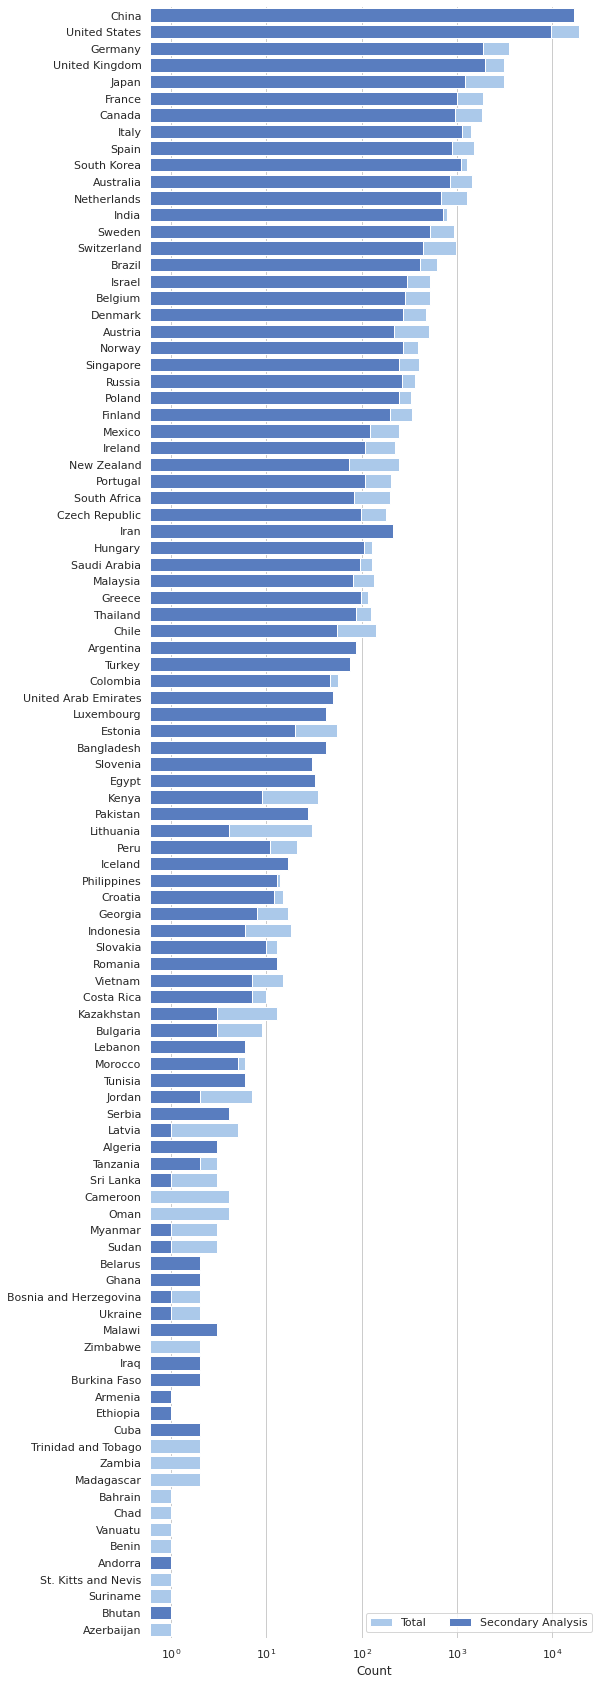

In [65]:
# visulization of counts of primary of secondary analysis publications
sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(figsize = (8, 30))
sns.set_color_codes('pastel')
sns.barplot(x = 'primary_count', y = 'country', data = reuse_table, label = 'Total', color = 'b', log = True)

sns.set_color_codes('muted')
sns.barplot(x = 'secondary_count', y = 'country', data = reuse_table, label = 'Secondary Analysis', color = 'b', log = True)
ax.legend(ncol = 2, loc = 'lower right', frameon = True)
ax.set(xlim=(0, 30000), ylabel = '', xlabel = 'Count')
sns.despine(left = True, bottom = True)
plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/analysis_count.png', dpi = 300, bbox_inches = 'tight')

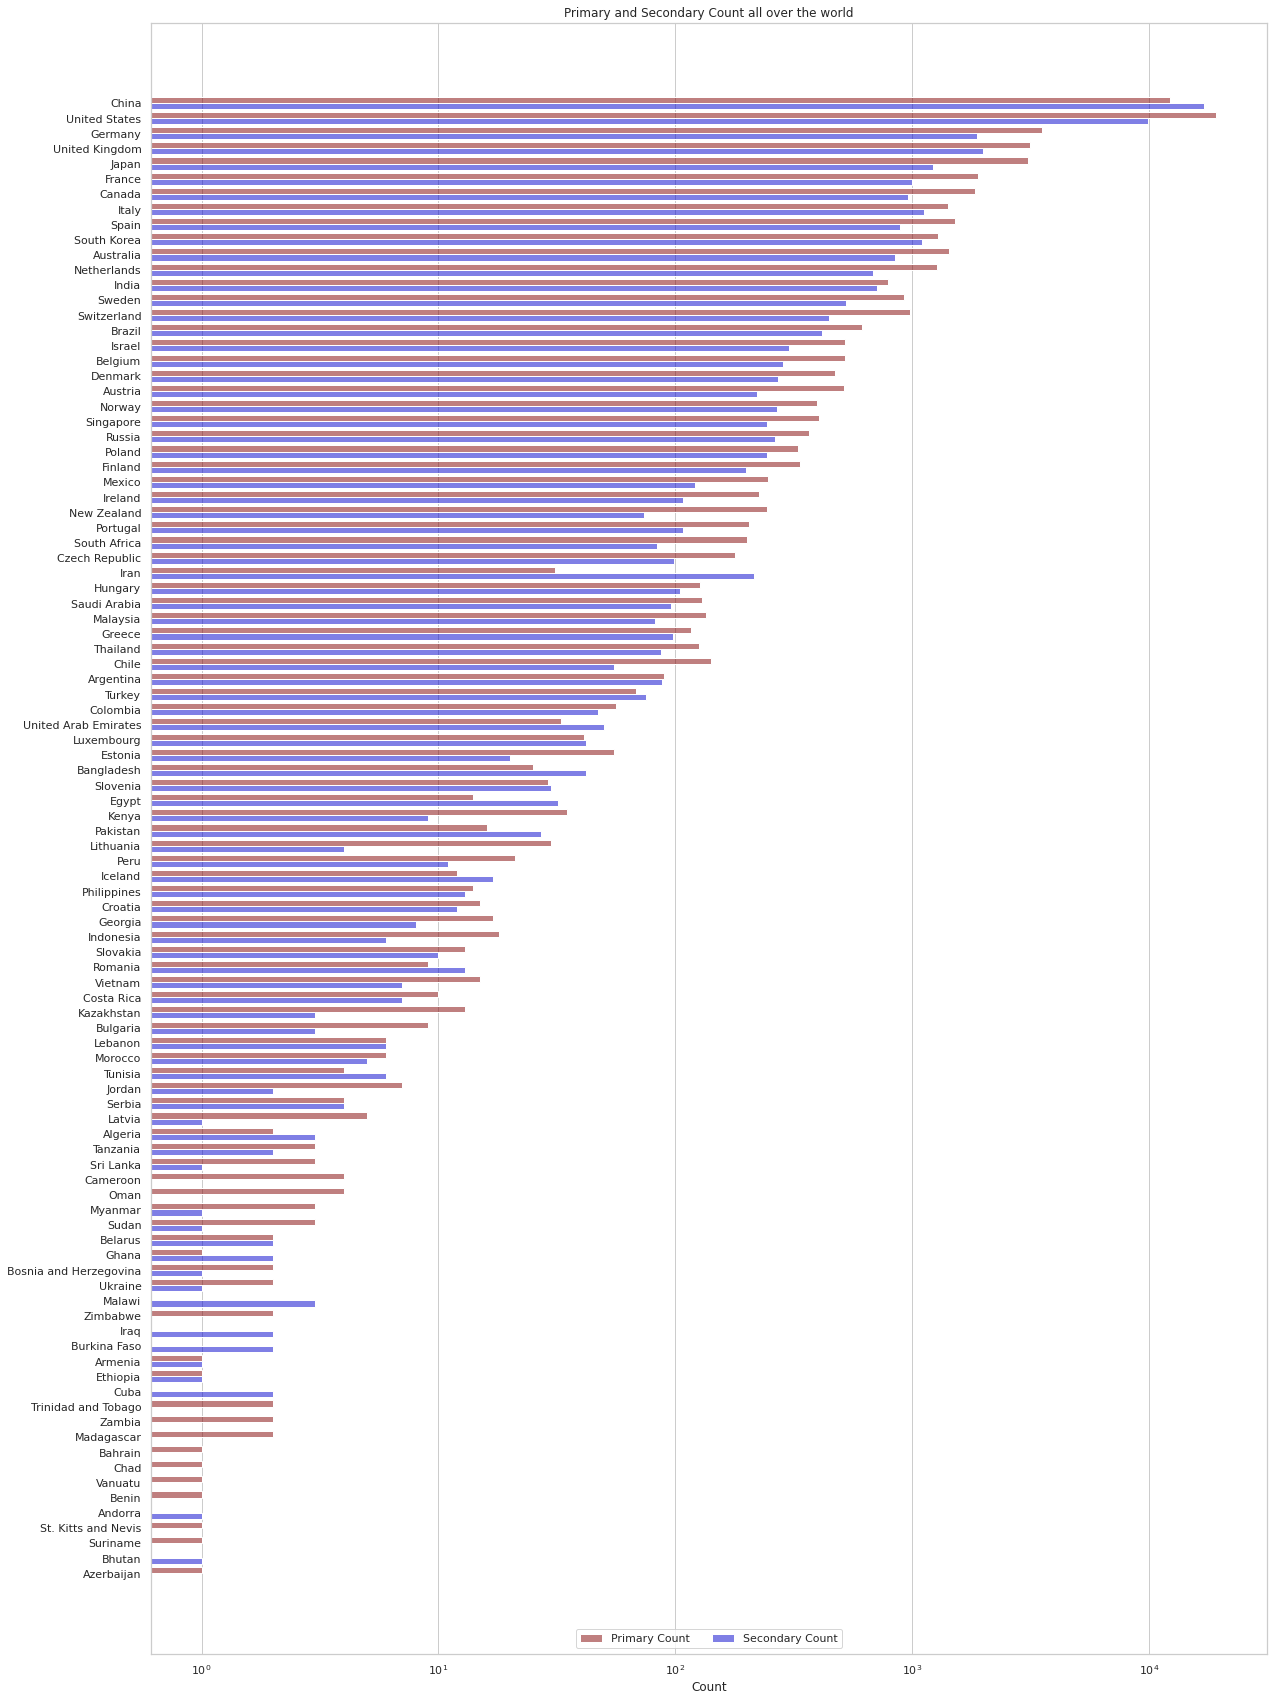

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

pos = list(range(len(reuse_table['country'])))
width = 0.4

fig, ax = plt.subplots(figsize=(20, 30))

ax.barh([p - width/2 for p in pos], abs(reuse_table['primary_count']), width, color=(0.5, 0, 0, 0.5), label='Primary Count')
ax.barh([p + width/2 for p in pos], abs(reuse_table['secondary_count']), width, color=(0, 0, 0.8, 0.5), label='Secondary Count')

ax.set_yticks(pos)
ax.set_yticklabels(reuse_table['country'])
ax.set_ylabel('')
ax.set_xlabel('Count')
ax.set_title('Primary and Secondary Count all over the world')

ax.set_xscale('log')

ax.invert_yaxis()

ax.set_facecolor('white')
fig.patch.set_facecolor('white')

ax.grid(False)
ax.xaxis.grid(True)

ax.legend(loc='lower center', ncol=2)

plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/new_analysis_count.png', dpi = 300, bbox_inches = 'tight')

plt.show()


In [67]:
reuse_table

,country,secondary_count,primary_count,total_count,secondary%,primary%,UNcode,continent,Per_Capita_GDP,GDP,Population,status
0,China,17155.0,12270.0,29425.0,58.300765,41.699235,156,Asia,12437.206098,1.773413e+13,1425893464,upper_middle_income
1,United States,9880.0,19247.0,29127.0,33.920417,66.079583,840,America,69184.704400,2.331508e+13,336997624,high_income
2,Germany,1883.0,3545.0,5428.0,34.690494,65.309506,276,Europe,51073.117894,4.259935e+12,83408554,high_income
3,United Kingdom,2001.0,3135.0,5136.0,38.960280,61.039720,826,Europe,46541.756927,3.131378e+12,67281040,high_income
4,Japan,1223.0,3097.0,4320.0,28.310185,71.689815,392,Asia,39649.927505,4.940878e+12,124612530,high_income
...,...,...,...,...,...,...,...,...,...,...,...,...
93,Andorra,1.0,0.0,1.0,100.000000,0.000000,20,Europe,42066.041570,3.324648e+09,79034,high_income
94,St. Kitts and Nevis,0.0,1.0,1.0,0.000000,100.000000,659,America,18082.687990,8.608444e+08,47606,NaN
95,Suriname,0.0,1.0,1.0,0.000000,100.000000,740,America,5259.262972,3.223849e+09,612984,upper_middle_income
96,Bhutan,1.0,0.0,1.0,100.000000,0.000000,64,Asia,3062.914975,2.381374e+09,777486,lower_middle_income


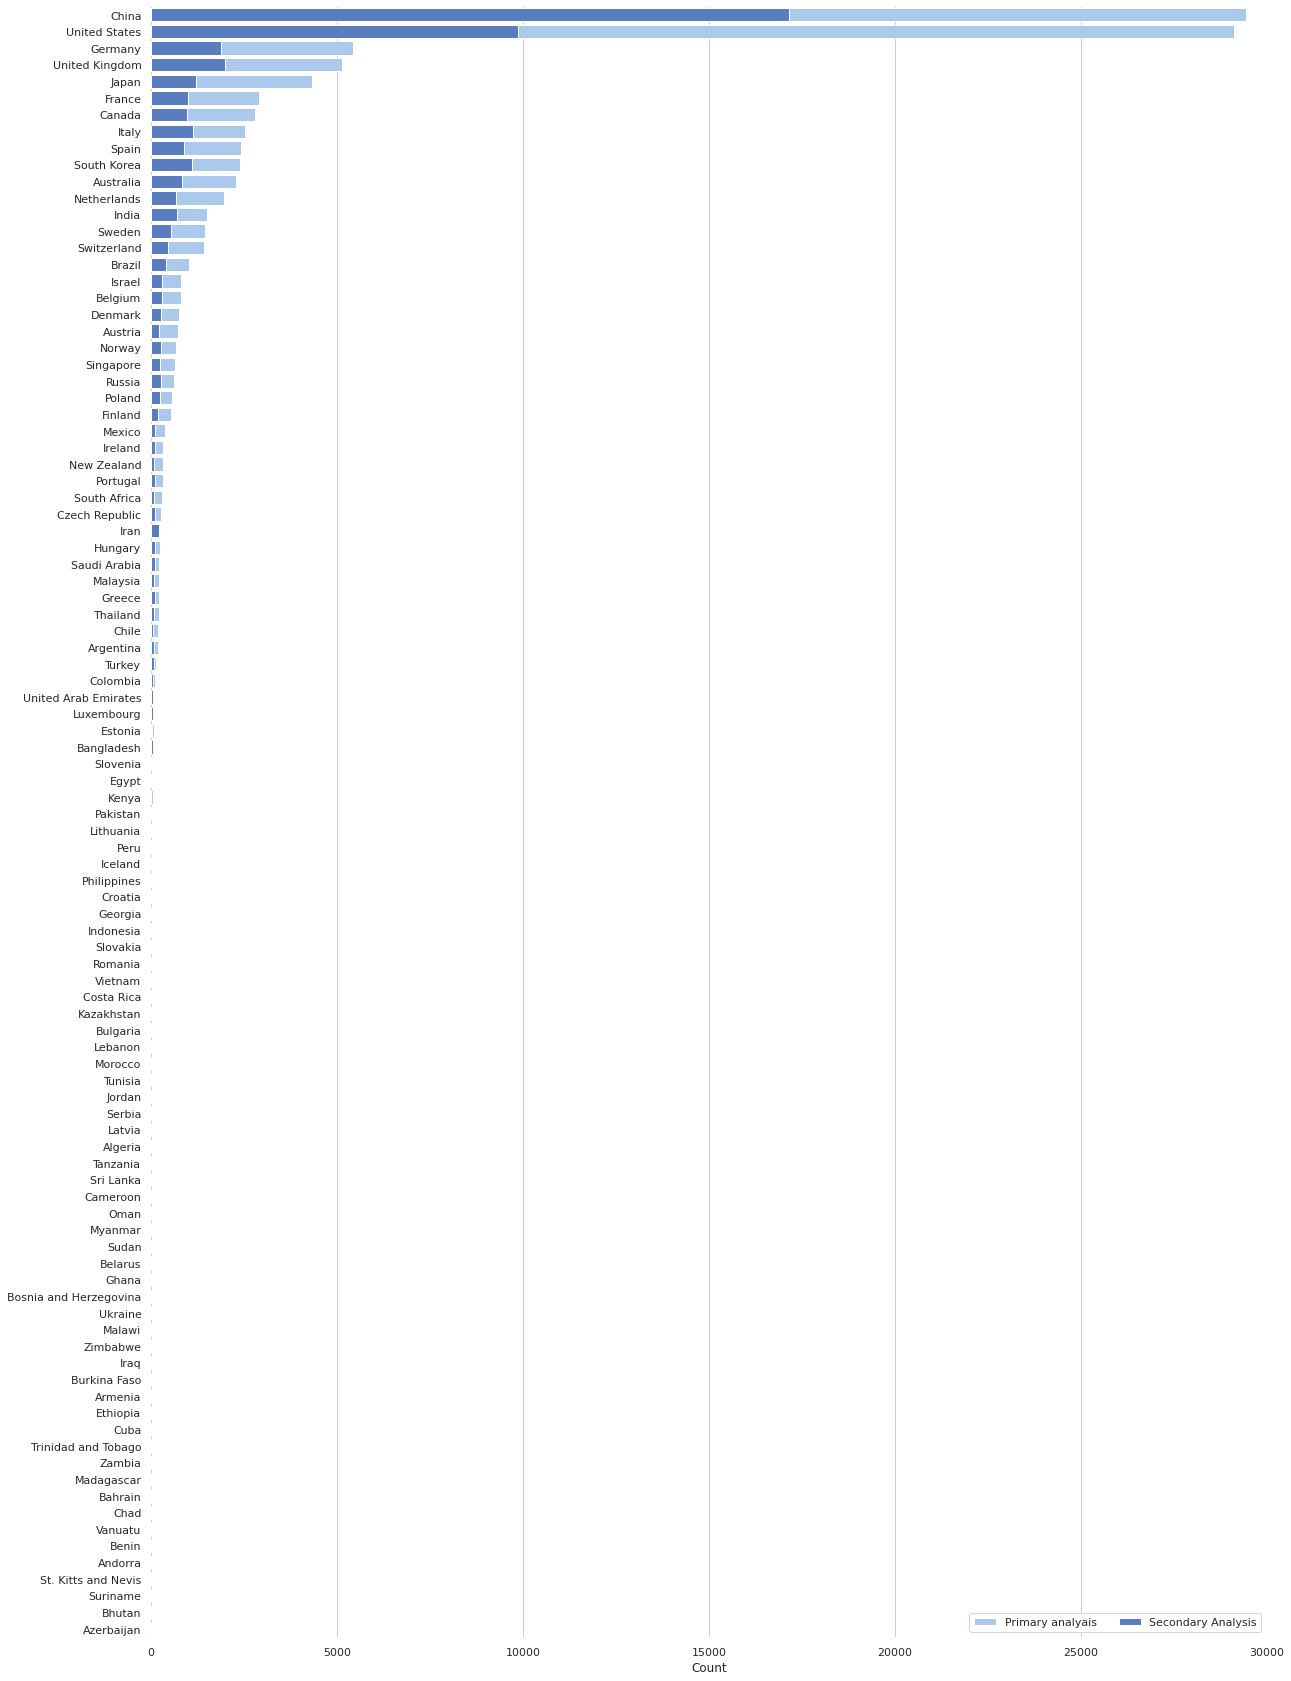

In [68]:
# visulization of counts of primary and secondary analysis publications
sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(figsize = (20, 30))
total = reuse_table
sns.set_color_codes('pastel')
sns.barplot(x = 'total_count', y = 'country', data = total, label = 'Primary analyais', color = 'b')

sns.set_color_codes('muted')
sns.barplot(x = 'secondary_count', y = 'country', data = total, label = 'Secondary Analysis', color = 'b')
ax.legend(ncol = 2, loc = 'lower right', frameon = True)
ax.set(xlim=(0, 30000), ylabel = '', xlabel = 'Count')
sns.despine(left = True, bottom = True)
plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/analysis_count.png', dpi = 300, bbox_inches = 'tight')

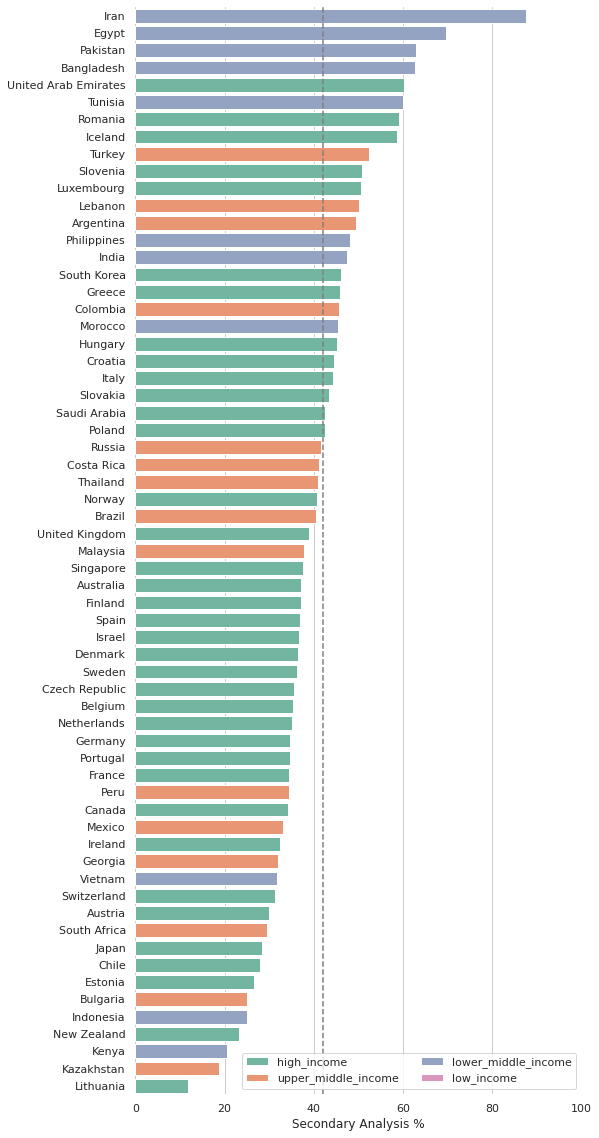

In [69]:
sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(figsize = (8, 20))
hue_order = ['high_income', 'upper_middle_income', 'lower_middle_income', 'low_income']
reuse_table_removed_sorted = reuse_table_removed.sort_values('secondary%', ascending = False)
sns.barplot(x = 'secondary%', y = 'country', data = reuse_table_removed_sorted, hue = 'status', dodge = False, palette = sns.color_palette('Set2'), hue_order = hue_order)
ax.legend(ncol = 2, loc = 'lower right', frameon = True)
ax.set(xlim = (0, 100), ylabel = '', xlabel = 'Secondary Analysis %')
ax.axvline(x = 42.089780824220463 , color = 'grey' , linestyle = 'dashed')
sns.despine(left = True, bottom = True)
plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/analysis_secondary_percent.png', dpi = 300, bbox_inches = 'tight')

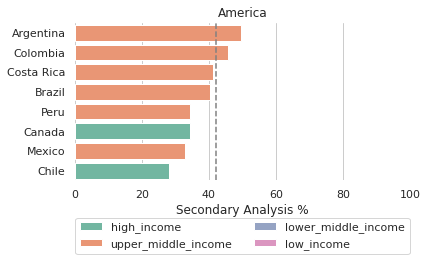

In [70]:
# America
sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(figsize = (6, 2.9))
total_America = reuse_table_removed[reuse_table_removed.continent == 'America'].sort_values('secondary%', ascending = False)
hue_order = ['high_income', 'upper_middle_income', 'lower_middle_income', 'low_income']
sns.barplot(x = 'secondary%', y = 'country', data = total_America, hue = 'status', dodge = False, palette = sns.color_palette('Set2'), hue_order = hue_order)
ax.legend(ncol = 2, loc = 'lower right', frameon = True)
ax.set(xlim = (0, 100), ylabel = '', xlabel = 'Secondary Analysis %')
ax.axvline(x = 42.089780824220463 , color = 'grey' , linestyle = 'dashed')
sns.despine(left = True, bottom = True)
ax.legend(loc = 'lower center', bbox_to_anchor = (0.5, -0.5), ncol = 2)
plt.title('America')
plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/analysis_secondary_percent_America.png', dpi = 300, bbox_inches = 'tight')

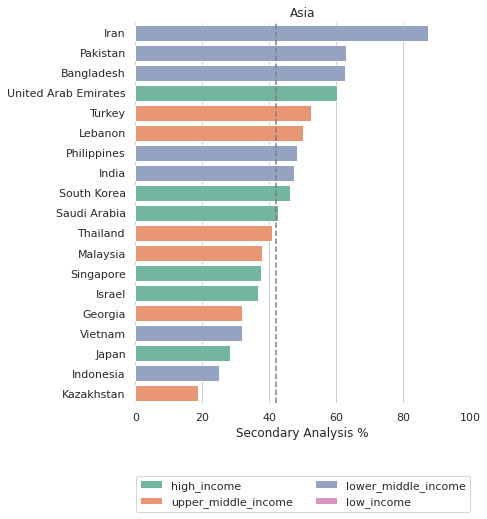

In [71]:
# Asia
sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(figsize = (6, 7))
total_Asia = reuse_table_removed[reuse_table_removed.continent == 'Asia'].sort_values('secondary%', ascending = False)
hue_order = ['high_income', 'upper_middle_income', 'lower_middle_income', 'low_income']
sns.barplot(x = 'secondary%', y = 'country', data = total_Asia, hue = 'status', dodge = False, palette = sns.color_palette('Set2'), hue_order = hue_order)
ax.legend(ncol = 2, loc = 'lower right', frameon = True)
ax.set(xlim = (0, 100), ylabel = '', xlabel = 'Secondary Analysis %')
ax.axvline(x = 42.089780824220463 , color = 'grey' , linestyle = 'dashed')
sns.despine(left = True, bottom = True)
ax.legend(loc = 'lower center', bbox_to_anchor = (0.5, -0.3), ncol = 2)
plt.title('Asia')
plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/analysis_secondary_percent_Asia.png', dpi = 300, bbox_inches = 'tight')

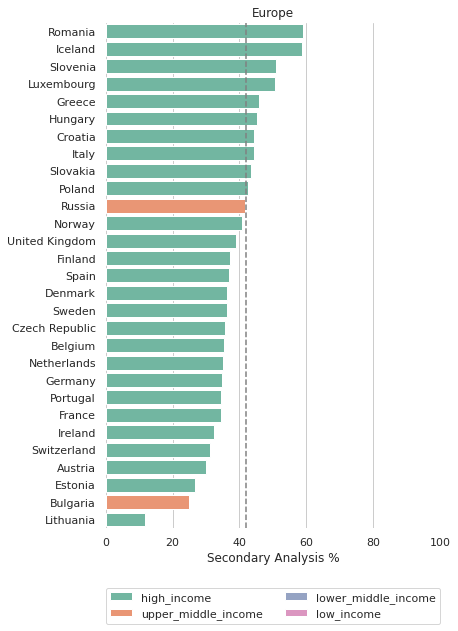

In [72]:
# Europe
sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(figsize = (6, 9.3))
total_Europe = reuse_table_removed[reuse_table_removed.continent == 'Europe'].sort_values('secondary%', ascending = False)
hue_order = ['high_income', 'upper_middle_income', 'lower_middle_income', 'low_income']
sns.barplot(x = 'secondary%', y = 'country', data = total_Europe, hue = 'status', dodge = False, palette = sns.color_palette('Set2'), hue_order = hue_order)
ax.legend(ncol = 2, loc = 'lower right', frameon = True)
ax.set(xlim = (0, 100), ylabel = '', xlabel = 'Secondary Analysis %')
ax.axvline(x = 42.089780824220463 , color = 'grey' , linestyle = 'dashed')
sns.despine(left = True, bottom = True)
ax.legend(loc = 'lower center', bbox_to_anchor = (0.5, -0.2), ncol = 2)
plt.title('Europe')
plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/analysis_secondary_percent_Europe.png', dpi = 300, bbox_inches = 'tight')

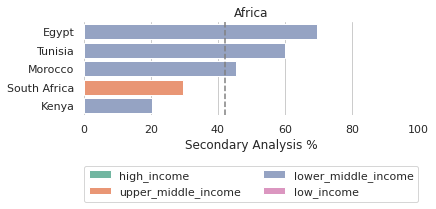

In [73]:
# Africa
sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(figsize = (6, 1.7))
total_Africa = reuse_table_removed[reuse_table_removed.continent == 'Africa'].sort_values('secondary%', ascending = False)
hue_order = ['high_income', 'upper_middle_income', 'lower_middle_income', 'low_income']
sns.barplot(x = 'secondary%', y = 'country', data = total_Africa, hue = 'status', dodge = False, palette = sns.color_palette('Set2'), hue_order = hue_order)
ax.legend(ncol = 2, loc = 'lower right', frameon = True)
ax.set(xlim = (0, 100), ylabel = '', xlabel = 'Secondary Analysis %')
ax.axvline(x = 42.089780824220463 , color = 'grey' , linestyle = 'dashed')
sns.despine(left = True, bottom = True)
ax.legend(loc = 'lower center', bbox_to_anchor = (0.5, -1), ncol = 2)
plt.title('Africa')
plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/analysis_secondary_percent_Africa.png', dpi = 300, bbox_inches = 'tight')

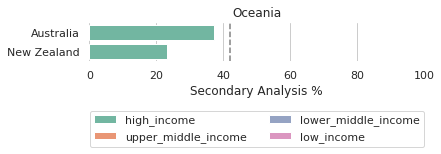

In [74]:
# Oceania
sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(figsize = (6, 0.7))
total_Oceania = reuse_table_removed[reuse_table_removed.continent == 'Oceania'].sort_values('secondary%', ascending = False)
hue_order = ['high_income', 'upper_middle_income', 'lower_middle_income', 'low_income']
sns.barplot(x = 'secondary%', y = 'country', data = total_Oceania, hue = 'status', dodge = False, palette = sns.color_palette('Set2'), hue_order = hue_order)
ax.legend(ncol = 2, loc = 'lower right', frameon = True)
ax.set(xlim = (0, 100), ylabel = '', xlabel = 'Secondary Analysis %')
ax.axvline(x = 42.089780824220463 , color = 'grey' , linestyle = 'dashed')
sns.despine(left = True, bottom = True)
ax.legend(loc = 'lower center', bbox_to_anchor = (0.5, -2.4), ncol = 2)
plt.title('Oceania')
plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/analysis_secondary_percent_Oceania.png', dpi = 300, bbox_inches = 'tight')

In [75]:
# Primary Analysis Percent (Global)
# sns.set_theme(style = 'whitegrid')
# f, ax = plt.subplots(figsize = (8, 30))
# total = reuse_table.sort_values('primary%', ascending = False)

# sns.set_color_codes('muted')
# sns.barplot(x = 'primary%', y = 'country', data = total, label = 'Primary Analysis', color = 'g')
# ax.legend(ncol = 2, loc = 'lower right', frameon = True)
# ax.set(xlim = (0, 100), ylabel = 'Country', xlabel = 'Primary Analysis %')
# ax.axvline(x = 42.089780824220463 , color ='blue' , linestyle='dashed')
# sns.despine(left = True, bottom = True)
# plt.savefig(fname = '/scratch1/qiushipe/data_reusability/figures/analysis_primary_percent.png', dpi = 300, bbox_inches = 'tight')

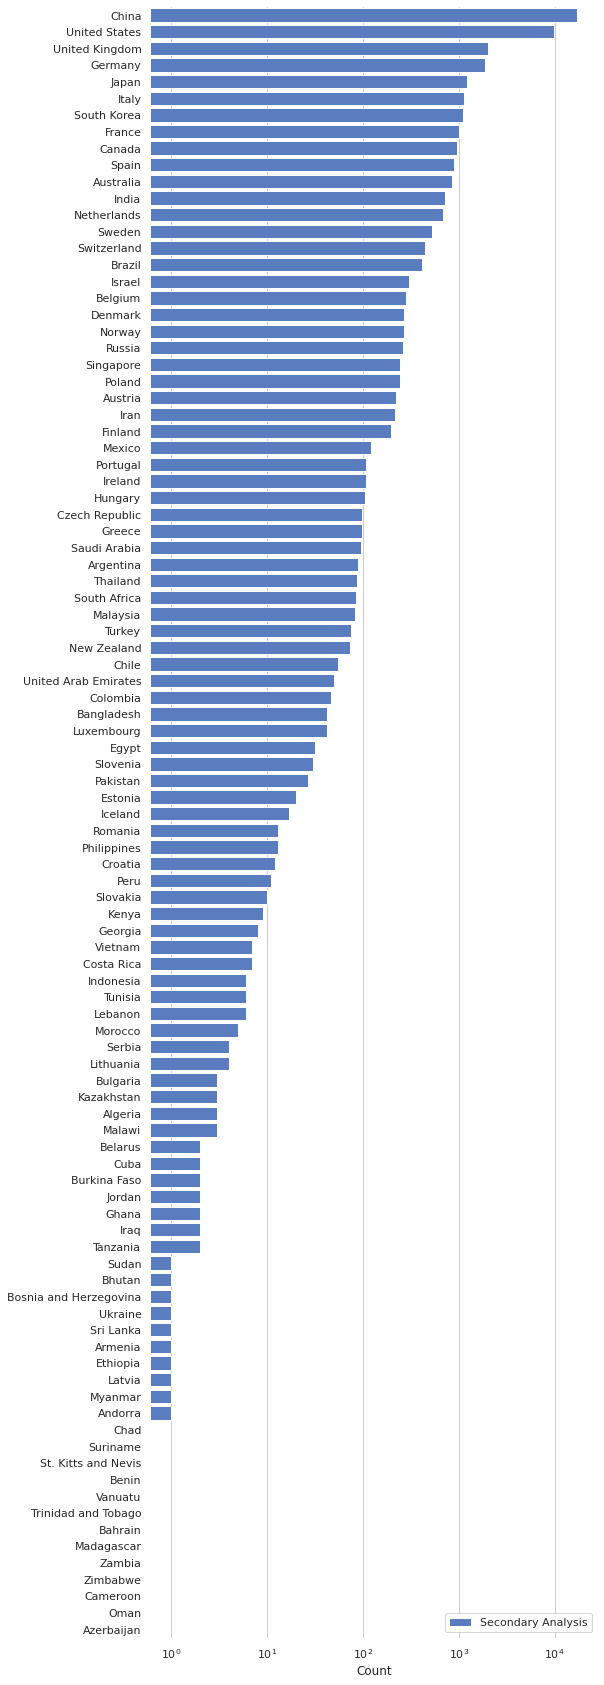

In [76]:
# visulization of counts of primary of secondary analysis publications
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(figsize = (8, 30))
total = reuse_table.sort_values('secondary_count', ascending = False)
sns.set_color_codes('muted')
sns.barplot(x = 'secondary_count', y = 'country', data = total, label = 'Secondary Analysis', color = 'b', log = True)
ax.legend(ncol = 2, loc = 'lower right', frameon = True)
ax.set(ylabel = '', xlabel = 'Count')
sns.despine(left = True, bottom = True)
plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/secondary_analysis_count.png', dpi = 300, bbox_inches = 'tight')

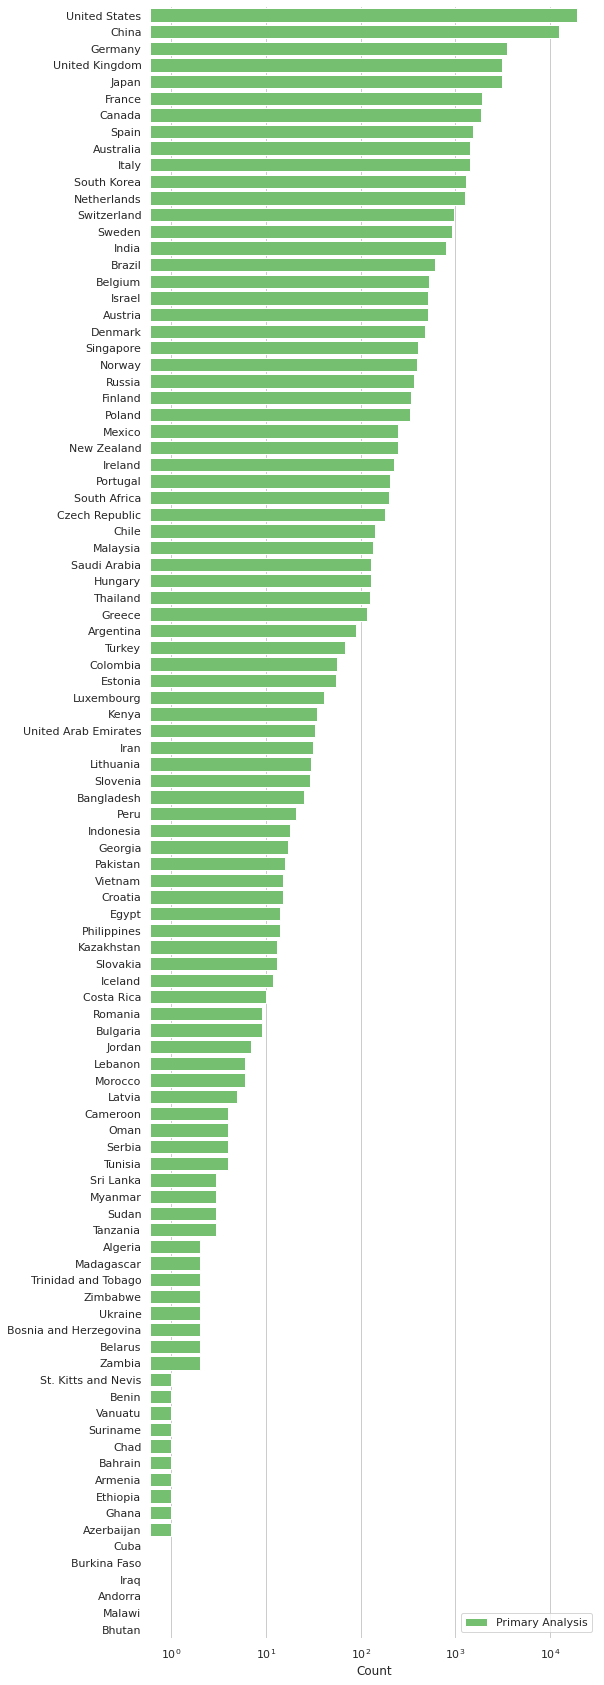

In [77]:
# visulization of counts of primary of secondary analysis publications
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(figsize = (8, 30))
total = reuse_table.sort_values('primary_count', ascending = False)
sns.set_color_codes('muted')
sns.barplot(x = 'primary_count', y = 'country', data = total, label = 'Primary Analysis', color = 'g', log = True)
ax.legend(ncol = 2, loc = 'lower right', frameon = True)
ax.set(ylabel = '', xlabel = 'Count')
sns.despine(left = True, bottom = True)
plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/primary_analysis_count.png', dpi = 300, bbox_inches = 'tight')

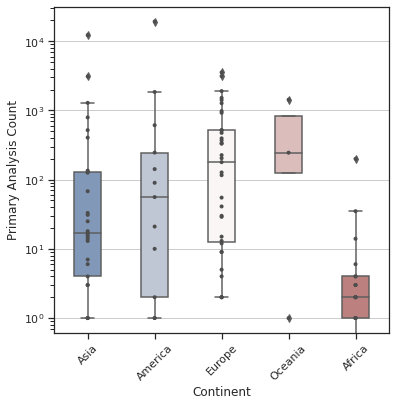

In [78]:
# boxplot of primary analysis (x axis are continents and y are absolute numbers)
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))
ax.set_yscale('log')

total = reuse_table

sns.boxplot(y = 'primary_count', x = 'continent', data = total, whis = [5, 95], width = .4, palette = 'vlag')

sns.stripplot(y = 'primary_count', x = 'continent', data = total, size = 4, color = '.3', linewidth = 0, jitter=False)

ax.yaxis.grid(True)
ax.set(ylabel = 'Primary Analysis Count', xlabel = 'Continent')

plt.xticks(rotation = 45)
plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/primary_analysis_count_boxplot.png', dpi = 300, bbox_inches = 'tight')

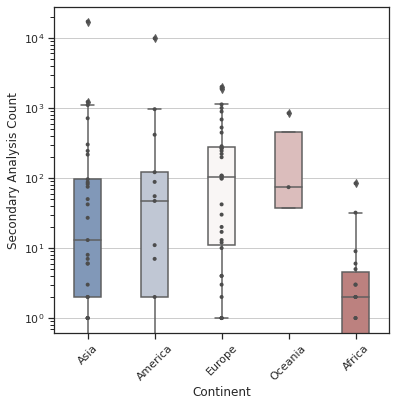

In [79]:
# boxplot of secondary analysis (x axis are continents and y are absolute numbers)
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))
ax.set_yscale('log')

sns.boxplot(y = 'secondary_count', x = 'continent', data = reuse_table, whis = [5, 95], width = .4, palette = 'vlag')

sns.stripplot(y = 'secondary_count', x = 'continent', data = reuse_table, size = 4, color = '.3', linewidth = 0, jitter=False)

ax.yaxis.grid(True)
ax.set(ylabel = 'Secondary Analysis Count', xlabel = 'Continent')

plt.xticks(rotation=45)
plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/secondary_analysis_count_boxplot.png', dpi = 300, bbox_inches = 'tight')

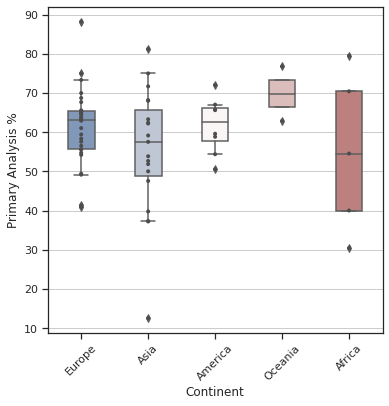

In [80]:
# boxplot of primary analysis (x axis are continents and y axis %)
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))

sns.boxplot(y = 'primary%', x = 'continent', data = reuse_table_removed, whis = [5, 95], width = .4, palette = 'vlag')
sns.stripplot(y = 'primary%', x = 'continent', data = reuse_table_removed, size = 4, color = '.3', linewidth = 0, jitter = False)

ax.yaxis.grid(True)
ax.set(ylabel = 'Primary Analysis %', xlabel = 'Continent')

plt.xticks(rotation=45)
plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/primary_analysis_percent_boxplot.png', dpi = 300, bbox_inches = 'tight')

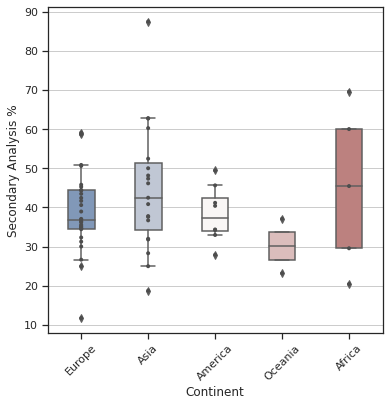

In [81]:
# boxplot of secondary analysis (x axis are continents and y axis %)
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))


sns.boxplot(y = 'secondary%', x = 'continent', data = reuse_table_removed, whis = [5, 95], width = .4, palette = 'vlag')
sns.stripplot(y = 'secondary%', x = 'continent', data = reuse_table_removed, size = 4, color = '.3', linewidth = 0, jitter = False)

ax.yaxis.grid(True)
ax.set(ylabel = 'Secondary Analysis %', xlabel = 'Continent')

plt.xticks(rotation=45)
plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/secondary_analysis_percent_continent_boxplot.png', dpi = 300, bbox_inches = 'tight')

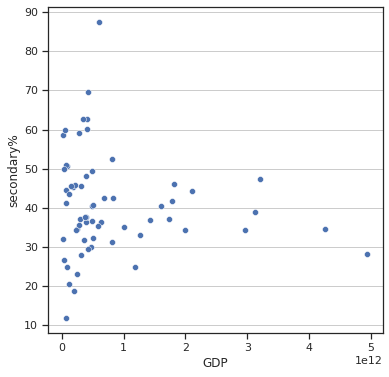

In [82]:
# Secondary% v.s. GDP
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))

sns.scatterplot(data = reuse_table_removed, x = 'GDP', y = 'secondary%', palette = 'pastel')

ax.yaxis.grid(True)
ax.set(ylabel = 'secondary%', xlabel = 'GDP')
plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/secondary_percent_GDP.png', dpi = 300, bbox_inches = 'tight')

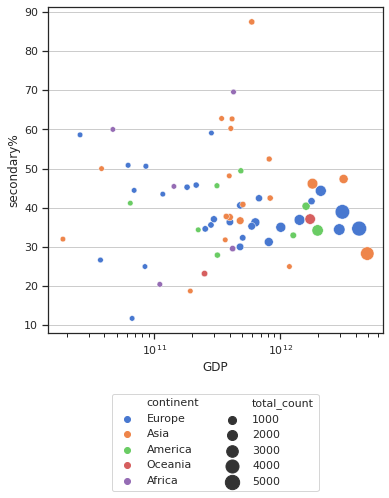

In [83]:
# Secondary% v.s. GDP (log)
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))
ax.set_xscale('log')

sns.scatterplot(data = reuse_table_removed, x = 'GDP', y = 'secondary%', palette = 'muted', hue = 'continent', size = 'total_count', sizes = (30, 220))

ax.yaxis.grid(True)
ax.set(ylabel = 'secondary%', xlabel = 'GDP')
ax.legend(loc = 'lower center', bbox_to_anchor = (0.5, -0.5), ncol = 2)
plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/secondary_percent_GDP_log.png', dpi = 300, bbox_inches = 'tight')

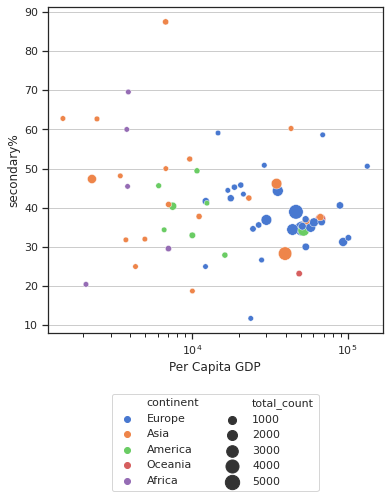

In [84]:
# Secondary% v.s. GDP (log)
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))
ax.set_xscale('log')

sns.scatterplot(data = reuse_table_removed, x = 'Per_Capita_GDP', y = 'secondary%', palette = 'muted', hue = 'continent', size = 'total_count', sizes = (30, 220))

ax.yaxis.grid(True)
ax.set(ylabel = 'secondary%', xlabel = 'Per Capita GDP')
ax.legend(loc = 'lower center', bbox_to_anchor = (0.5, -0.5), ncol = 2)
plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/secondary_percent_Per_Capita_GDP.png', dpi = 300, bbox_inches = 'tight')

[Text(0, 0.5, 'secondary%'), Text(0.5, 0, 'Per Capita GDP')]

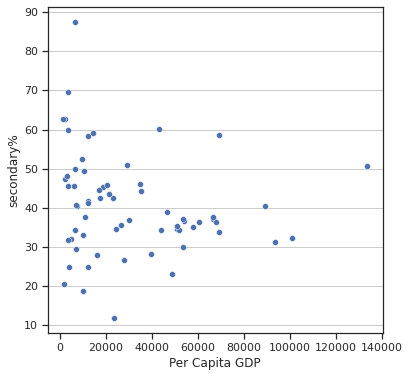

In [85]:
# Secondary% v.s. Per Capita GDP
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))

sns.scatterplot(data = reuse_table_min_removed, x = 'Per_Capita_GDP', y = 'secondary%', palette = 'pastel')

ax.yaxis.grid(True)
ax.set(ylabel = 'secondary%', xlabel = 'Per Capita GDP')
# plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/secondary_percent_Per_Capita_GDP.png', dpi = 300, bbox_inches = 'tight')

In [86]:
reuse_table_min_removed

,country,secondary_count,primary_count,total_count,secondary%,primary%,UNcode,continent,Per_Capita_GDP,GDP,Population,status
0,China,17155.0,12270.0,29425.0,58.300765,41.699235,156,Asia,12437.206098,1.773413e+13,1425893464,upper_middle_income
1,United States,9880.0,19247.0,29127.0,33.920417,66.079583,840,America,69184.704400,2.331508e+13,336997624,high_income
2,Germany,1883.0,3545.0,5428.0,34.690494,65.309506,276,Europe,51073.117894,4.259935e+12,83408554,high_income
3,United Kingdom,2001.0,3135.0,5136.0,38.960280,61.039720,826,Europe,46541.756927,3.131378e+12,67281040,high_income
4,Japan,1223.0,3097.0,4320.0,28.310185,71.689815,392,Asia,39649.927505,4.940878e+12,124612530,high_income
...,...,...,...,...,...,...,...,...,...,...,...,...
60,Kazakhstan,3.0,13.0,16.0,18.750000,81.250000,398,Asia,10054.890082,1.930183e+11,19196465,upper_middle_income
61,Bulgaria,3.0,9.0,12.0,25.000000,75.000000,100,Europe,12207.257715,8.405757e+10,6885868,upper_middle_income
62,Lebanon,6.0,6.0,12.0,50.000000,50.000000,422,Asia,6784.799328,3.794488e+10,5592631,upper_middle_income
63,Morocco,5.0,6.0,11.0,45.454545,54.545455,504,Africa,3853.283332,1.428666e+11,37076584,lower_middle_income


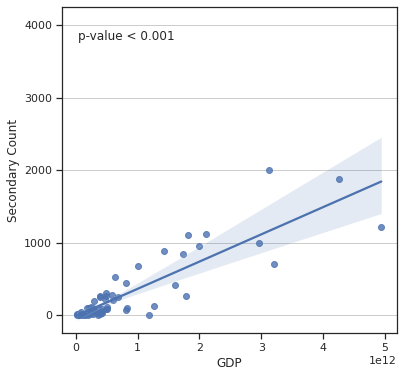

In [87]:
# secondary count vs GDP
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))
# ax.set_xscale('log')

# sns.scatterplot(data = total, x = 'GDP', y = 'secondary_count', palette = 'pastel')

sns.regplot(data = reuse_table_removed, x = 'GDP', y = 'secondary_count')

ax.yaxis.grid(True)

ax.set(ylabel = 'Secondary Count', xlabel = 'GDP')

slope, intercept, r_value, p_value, std_err = stats.linregress(reuse_table_removed['GDP'], reuse_table_removed['secondary_count'])
r_squared = r_value ** 2

# ax.annotate(f"R-squared = {r_squared:.2f}", xy = (0.05, 0.9), xycoords = 'axes fraction', fontsize = 12)
ax.annotate(f"p-value < 0.001", xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)

# Set y-axis limits and ticks
ax.set_ylim(-250, 4250)  # Set the lower y-axis limit to -500 and the upper limit to 4500
ax.yaxis.set_major_locator(ticker.FixedLocator([0, 1000, 2000, 3000, 4000]))

# plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/secondary_count_GDP.png', dpi = 300, bbox_inches = 'tight')

In [88]:
print(slope, intercept, r_value, p_value, std_err)

3.757405015843109e-10 -12.209721921716948 0.871374926940252 1.586599275216406e-20 2.7087021619885354e-11


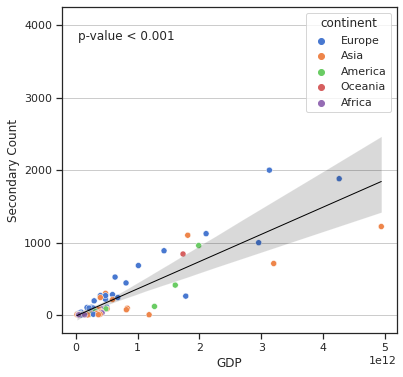

In [89]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))

sns.scatterplot(x = 'GDP', y='secondary_count', data = reuse_table_removed, hue = 'continent', palette = 'muted', ax = ax)
sns.regplot(x = 'GDP', y='secondary_count', data = reuse_table_removed, scatter = False, color = 'black', ax = ax, line_kws={'linewidth': 1})

ax.yaxis.grid(True)
ax.set(ylabel = 'Secondary Count', xlabel = 'GDP')
ax.set_ylim(-250, 4250)
ax.yaxis.set_major_locator(ticker.FixedLocator([0, 1000, 2000, 3000, 4000]))

slope, intercept, r_value, p_value, std_err = stats.linregress(reuse_table_removed['GDP'], reuse_table_removed['secondary_count'])
ax.annotate(f"p-value < 0.001", xy = (0.05, 0.9), xycoords = 'axes fraction', fontsize=12)

plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/secondary_count_GDP.png', dpi = 300, bbox_inches = 'tight')

plt.show()

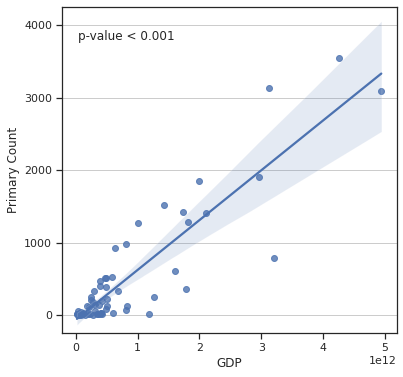

In [90]:
# primary count vs GDP
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))
# ax.set_xscale('log')

# sns.scatterplot(data = total, x = 'GDP', y = 'secondary_count', palette = 'pastel')
sns.regplot(data = reuse_table_removed, x = 'GDP', y = 'primary_count')

ax.yaxis.grid(True)
ax.set(ylabel = 'Primary Count', xlabel = 'GDP')

slope, intercept, r_value, p_value, std_err = stats.linregress(reuse_table_removed['GDP'], reuse_table_removed['primary_count'])
r_squared = r_value ** 2

# ax.annotate(f"R-squared = {r_squared:.2f}", xy = (0.05, 0.9), xycoords='axes fraction', fontsize = 12)
ax.annotate(f"p-value < 0.001", xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)

# Set y-axis limits and ticks
ax.set_ylim(-250, 4250)  # Set the lower y-axis limit to -500 and the upper limit to 4500
ax.yaxis.set_major_locator(ticker.FixedLocator([0, 1000, 2000, 3000, 4000]))

# plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/primary_count_GDP.png', dpi = 300, bbox_inches = 'tight')

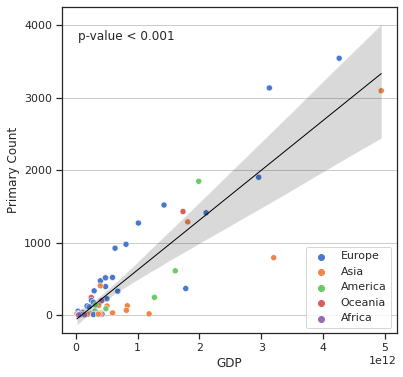

In [91]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))

sns.scatterplot(x = 'GDP', y='primary_count', data = reuse_table_removed, hue = 'continent', palette = 'muted', ax = ax)
sns.regplot(x = 'GDP', y='primary_count', data = reuse_table_removed, scatter = False, color = 'black', ax = ax, line_kws={'linewidth': 1})

ax.yaxis.grid(True)
ax.set(ylabel = 'Primary Count', xlabel = 'GDP')
ax.set_ylim(-250, 4250)
ax.yaxis.set_major_locator(ticker.FixedLocator([0, 1000, 2000, 3000, 4000]))

slope, intercept, r_value, p_value, std_err = stats.linregress(reuse_table_removed['GDP'], reuse_table_removed['secondary_count'])
ax.annotate(f"p-value < 0.001", xy = (0.05, 0.9), xycoords = 'axes fraction', fontsize=12)

plt.legend(loc = 'lower right')
plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/primary_count_GDP.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [92]:
print(slope, intercept, r_value, p_value, std_err)

3.757405015843109e-10 -12.209721921716948 0.871374926940252 1.586599275216406e-20 2.7087021619885354e-11


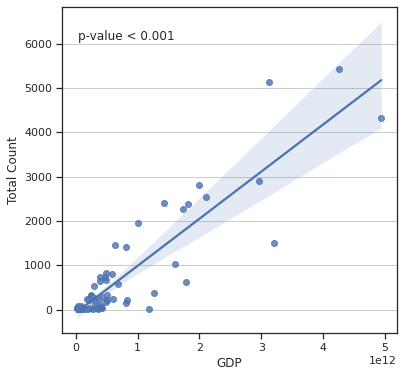

In [93]:
# total_count vs GDP
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))
#ax.set_xscale('log')

# sns.scatterplot(data = total, x = 'GDP', y = 'secondary_count', palette = 'pastel')
sns.regplot(data = reuse_table_removed, x = 'GDP', y = 'total_count')

ax.yaxis.grid(True)
ax.set(ylabel = 'Total Count', xlabel = 'GDP')

slope, intercept, r_value, p_value, std_err = stats.linregress(reuse_table_removed['GDP'], reuse_table_removed['total_count'])
r_squared = r_value ** 2

# ax.annotate(f"R-squared = {r_squared:.2f}", xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)
ax.annotate(f"p-value < 0.001", xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)
plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/total_count_GDP.png', dpi = 300, bbox_inches = 'tight')

In [94]:
print(slope, intercept, r_value, p_value, std_err)

1.063270078033327e-09 -75.82763164184098 0.8911443403863367 1.317759742901847e-22 6.931360182103282e-11


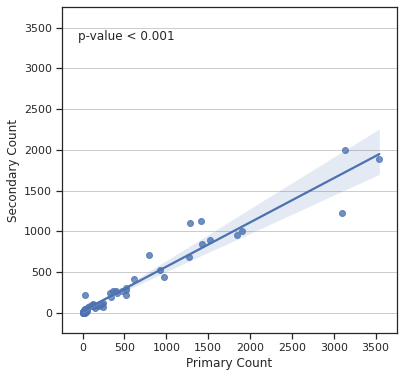

In [95]:
# secondary count vs primary count
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))
#ax.set_xscale('log')
#ax.set_yscale('log')

# sns.scatterplot(data = total, x = 'primary_count', y = 'secondary_count', palette = 'pastel')
sns.regplot(data = reuse_table_removed, x = 'primary_count', y = 'secondary_count', scatter_kws = {'color': 'b'})
ax.yaxis.grid(True)
ax.set(ylabel = 'Secondary Count', xlabel = 'Primary Count')

slope, intercept, r_value, p_value, std_err = stats.linregress(reuse_table_removed['primary_count'], reuse_table_removed['secondary_count'])
r_squared = r_value ** 2

# ax.annotate(f"R-squared = {r_squared:.2f}", xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)
ax.annotate(f"p-value < 0.001", xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)

# Set axis limits and ticks
ax.set_ylim(-250, 3750)
ax.set_xlim(-250, 3750)
ax.yaxis.set_major_locator(ticker.FixedLocator([0, 500, 1000, 1500, 2000, 2500, 3000, 3500]))
ax.xaxis.set_major_locator(ticker.FixedLocator([0, 500, 1000, 1500, 2000, 2500, 3000, 3500]))

plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/primary_secondary_count_log.png', dpi = 300, bbox_inches = 'tight')

In [96]:
print(slope, intercept, r_value, p_value, std_err)

0.5426053752730186 24.441215741273595 0.9694583208454725 6.128258399649753e-39 0.01757558883663522


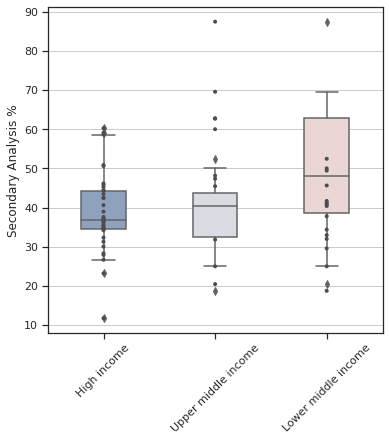

In [97]:
# boxplot of secondary analysis (x axis are status and y axis %)
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))

total = reuse_table

custom_order = ['high_income', 'upper_middle_income', 'lower_middle_income', 'low_income']

sns.boxplot(y = 'secondary%', x = 'status', data = reuse_table_removed, whis = [5, 95], width = .4, palette = 'vlag', order = custom_order)

sns.stripplot(y = 'secondary%', x = 'status', data = reuse_table_removed, size = 4, color = '.3', linewidth = 0, jitter = False)

ax.yaxis.grid(True)
ax.set(ylabel = 'Secondary Analysis %', xlabel = '')


plt.xticks(np.arange(3),['High income', 'Upper middle income', 'Lower middle income'], rotation = 45)

plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/secondary_analysis_percent_boxplot_status.png', dpi = 300, bbox_inches = 'tight')

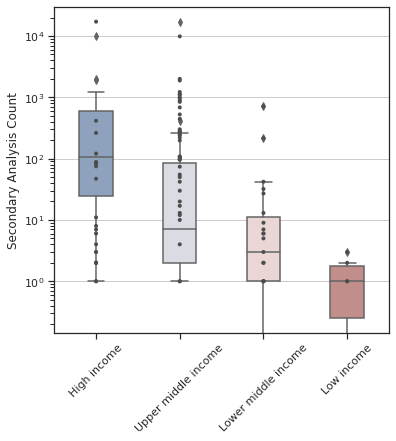

In [98]:
# boxplot of secondary analysis (x axis are status and y axis %)
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))

ax.set_yscale('log')

total = reuse_table

custom_order = ['high_income', 'upper_middle_income', 'lower_middle_income', 'low_income']
sns.boxplot(y = 'secondary_count' , x = 'status', data = total, whis = [5, 95], width = .4, palette = 'vlag', order = custom_order)
sns.stripplot(y = 'secondary_count' , x = 'status', data = total, size = 4, color = '.3', linewidth = 0, jitter = False)

ax.yaxis.grid(True)
ax.set(ylabel = 'Secondary Analysis Count', xlabel = '')


plt.xticks(np.arange(4),['High income', 'Upper middle income', 'Lower middle income', 'Low income'], rotation = 45)

plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/secondary_analysis_count_status_boxplot.png', dpi = 300, bbox_inches = 'tight')

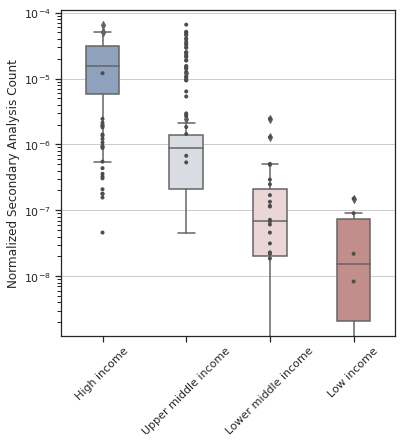

In [117]:
# boxplot of secondary analysis (x axis are status and y axis %)
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))

ax.set_yscale('log')

total = reuse_table

# add normalized secondary count 
total['norm_sec_cont'] = total['secondary_count'] / total['Population']

custom_order = ['high_income', 'upper_middle_income', 'lower_middle_income', 'low_income']
sns.boxplot(y = 'norm_sec_cont' , x = 'status', data = total, whis = [5, 95], width = .4, palette = 'vlag', order = custom_order)
sns.stripplot(y = 'norm_sec_cont' , x = 'status', data = total, size = 4, color = '.3', linewidth = 0, jitter = False)

ax.yaxis.grid(True)
ax.set(ylabel = 'Normalized Secondary Analysis Count', xlabel = '')


plt.xticks(np.arange(4),['High income', 'Upper middle income', 'Lower middle income', 'Low income'], rotation = 45)

plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/norm_sec_count_status_boxplot.png', dpi = 300, bbox_inches = 'tight')

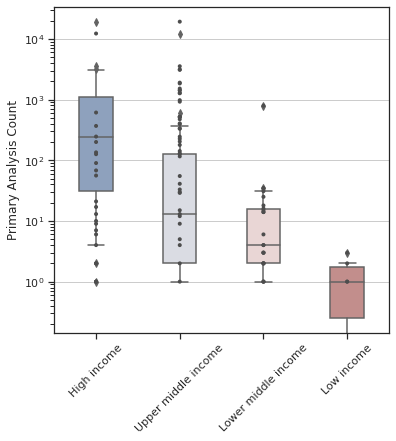

In [99]:
# boxplot of primary analysis (x axis are status and y axis %)
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))

ax.set_yscale('log')

total = reuse_table

custom_order = ['high_income', 'upper_middle_income', 'lower_middle_income', 'low_income']
sns.boxplot(y = 'primary_count' , x = 'status', data = total, whis = [5, 95], width = .4, palette = 'vlag', order = custom_order)
sns.stripplot(y = 'primary_count' , x = 'status', data = total, size = 4, color = '.3', linewidth = 0, jitter = False)

ax.yaxis.grid(True)
ax.set(ylabel = 'Primary Analysis Count', xlabel = '')


plt.xticks(np.arange(4),['High income', 'Upper middle income', 'Lower middle income', 'Low income'], rotation = 45)

plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/primary_analysis_percent_boxplot.png', dpi = 300, bbox_inches = 'tight')

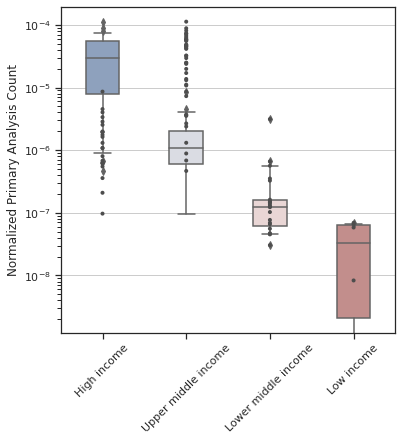

In [118]:
# boxplot of secondary analysis (x axis are status and y axis %)
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))

ax.set_yscale('log')

total = reuse_table

# add normalized secondary count 
total['norm_prim_cont'] = total['primary_count'] / total['Population']

custom_order = ['high_income', 'upper_middle_income', 'lower_middle_income', 'low_income']
sns.boxplot(y = 'norm_prim_cont' , x = 'status', data = total, whis = [5, 95], width = .4, palette = 'vlag', order = custom_order)
sns.stripplot(y = 'norm_prim_cont' , x = 'status', data = total, size = 4, color = '.3', linewidth = 0, jitter = False)

ax.yaxis.grid(True)
ax.set(ylabel = 'Normalized Primary Analysis Count', xlabel = '')


plt.xticks(np.arange(4),['High income', 'Upper middle income', 'Lower middle income', 'Low income'], rotation = 45)

plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/norm_prim_count_status_boxplot.png', dpi = 300, bbox_inches = 'tight')

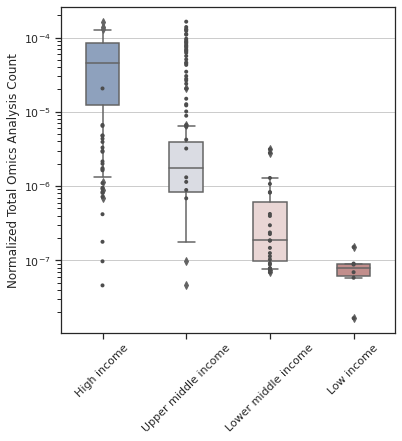

In [119]:
# boxplot of secondary analysis (x axis are status and y axis %)
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))

ax.set_yscale('log')

total = reuse_table

# add normalized secondary count 
total['norm_total_cont'] = total['total_count'] / total['Population']

custom_order = ['high_income', 'upper_middle_income', 'lower_middle_income', 'low_income']
sns.boxplot(y = 'norm_total_cont' , x = 'status', data = total, whis = [5, 95], width = .4, palette = 'vlag', order = custom_order)
sns.stripplot(y = 'norm_total_cont' , x = 'status', data = total, size = 4, color = '.3', linewidth = 0, jitter = False)

ax.yaxis.grid(True)
ax.set(ylabel = 'Normalized Total Omics Analysis Count', xlabel = '')


plt.xticks(np.arange(4),['High income', 'Upper middle income', 'Lower middle income', 'Low income'], rotation = 45)

plt.savefig(fname = '/scratch2/qiushipe/data_reusability/figures/norm_total_count_status_boxplot.png', dpi = 300, bbox_inches = 'tight')

In [115]:
reuse_table

,country,secondary_count,primary_count,total_count,secondary%,primary%,UNcode,continent,Per_Capita_GDP,GDP,Population,status,norm_sec_cont,norm_prim_cont
0,China,17155.0,12270.0,29425.0,58.300765,41.699235,156,Asia,12437.206098,1.773413e+13,1425893464,upper_middle_income,0.000012,8.605131e-06
1,United States,9880.0,19247.0,29127.0,33.920417,66.079583,840,America,69184.704400,2.331508e+13,336997624,high_income,0.000029,5.711316e-05
2,Germany,1883.0,3545.0,5428.0,34.690494,65.309506,276,Europe,51073.117894,4.259935e+12,83408554,high_income,0.000023,4.250164e-05
3,United Kingdom,2001.0,3135.0,5136.0,38.960280,61.039720,826,Europe,46541.756927,3.131378e+12,67281040,high_income,0.000030,4.659559e-05
4,Japan,1223.0,3097.0,4320.0,28.310185,71.689815,392,Asia,39649.927505,4.940878e+12,124612530,high_income,0.000010,2.485304e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Andorra,1.0,0.0,1.0,100.000000,0.000000,20,Europe,42066.041570,3.324648e+09,79034,high_income,0.000013,0.000000e+00
94,St. Kitts and Nevis,0.0,1.0,1.0,0.000000,100.000000,659,America,18082.687990,8.608444e+08,47606,NaN,0.000000,2.100576e-05
95,Suriname,0.0,1.0,1.0,0.000000,100.000000,740,America,5259.262972,3.223849e+09,612984,upper_middle_income,0.000000,1.631364e-06
96,Bhutan,1.0,0.0,1.0,100.000000,0.000000,64,Asia,3062.914975,2.381374e+09,777486,lower_middle_income,0.000001,0.000000e+00


In [100]:
# Change some countries' names to cater for pyecharts
reuse_table_2 = pd.read_csv(r'/scratch1/qiushipe/data_reusability/data_tables/reuse_table_modifiedcountryname.csv')

# because some countries only produces several analysis, this may have bad influences on our analyis, so we decided to remove them
reuse_table_2_removed = reuse_table_2[reuse_table_2['total_count'] > 9]

In [101]:
# Map for secondary analysis rate
from pyecharts import options as opts
from pyecharts.charts import Map
Map(init_opts = opts.InitOpts(width = '1400px',height = '600px', theme = 'default'))\
.add("国家", [list(z) for z in zip(reuse_table_2_removed['country'], reuse_table_2_removed['secondary%'])], 'world', is_map_symbol_show = False)\
.set_series_opts(label_opts = opts.LabelOpts(is_show = False))\
.set_global_opts(title_opts = opts.TitleOpts(title = 'Secondary analysis rate around the world', subtitle = '', pos_left = '20%'),
                 legend_opts = opts.LegendOpts(is_show = False),
                 visualmap_opts = opts.VisualMapOpts(is_calculable = True, 
                                                     dimension = 0,
                                                     pos_left = '30', pos_top = 'center',
                                                     range_text = ['High', 'Low'],
                                                     range_color = ['#A50026', '#D73027', '#F46D43', '#F46D43', '#FDAE61', '#FFFFBF','#E0F3F8', '#ABD9E9', '#74ADD1', '#4575B4', '#313695'],
                                                     textstyle_opts = opts.TextStyleOpts(color = '#000000'),
                                                     min_ = 0, max_ = 100,)).render('/scratch2/qiushipe/data_reusability/figures/Map.html')
# range_color = ['#A50026', '#D73027', '#F46D43', '#FDAE61', 'FEE090'???, '#FFFFBF', '#E0F3F8', '#ABD9E9', '#74ADD1', '#4575B4', '#313695']

'/scratch2/qiushipe/data_reusability/figures/Map.html'

In [102]:
# Map for secondary analysis count
Map(init_opts = opts.InitOpts(width = '1400px',height = '600px', theme = 'default'))\
.add("国家", [list(z) for z in zip(reuse_table_2_removed['country'], reuse_table_2_removed['secondary_count'])], 'world', is_map_symbol_show = False)\
.set_series_opts(label_opts = opts.LabelOpts(is_show = False))\
.set_global_opts(title_opts = opts.TitleOpts(title = 'Secondary analysis counts around the world', subtitle = '', pos_left = '20%'),
                 legend_opts = opts.LegendOpts(is_show = False),
                 visualmap_opts = opts.VisualMapOpts(is_calculable = True, 
                                                     dimension = 0,
                                                     pos_left = '30', pos_top = 'center',
                                                     range_text = ['High', 'Low'],
                                                     range_color = ['#9E9AC8', '#807DBA', '#6A00BA', '#54278F', '#3F007D'],
                                                     textstyle_opts = opts.TextStyleOpts(color = '#000000'),
                                                     min_ = 0, max_ = 2000,)).render('/scratch2/qiushipe/data_reusability/figures/Map_secondary_count.html')

# range_color = ['#FCFBFD', '#EFEDF5', '#DADAEB', '#BCBDDC', '#9E9AC8', '#807DBA', '#6A00BA', '#54278F', '#3F007D']

'/scratch2/qiushipe/data_reusability/figures/Map_secondary_count.html'

In [103]:
# Map for primary analysis rate
Map(init_opts = opts.InitOpts(width = '1400px',height = '600px', theme = 'default'))\
.add("国家", [list(z) for z in zip(reuse_table_2_removed['country'], reuse_table_2_removed['primary_count'])], 'world', is_map_symbol_show = False)\
.set_series_opts(label_opts = opts.LabelOpts(is_show = False))\
.set_global_opts(title_opts = opts.TitleOpts(title = 'Primary analysis counts around the world', subtitle = '', pos_left = '20%'),
                 legend_opts = opts.LegendOpts(is_show = False),
                 visualmap_opts = opts.VisualMapOpts(is_calculable = True, 
                                                     dimension = 0,
                                                     pos_left = '30', pos_top = 'center',
                                                     range_text = ['High', 'Low'],
                                                     range_color = ['#9E9AC8', '#807DBA', '#6A00BA', '#54278F', '#3F007D'],
                                                     textstyle_opts = opts.TextStyleOpts(color = '#000000'),
                                                     min_ = 0, max_ = 2000,)).render('/scratch2/qiushipe/data_reusability/figures/Map_primary_count.html')

# range_color = ['#FCFBFD', '#EFEDF5', '#DADAEB', '#BCBDDC', '#9E9AC8', '#807DBA', '#6A00BA', '#54278F', '#3F007D']

'/scratch2/qiushipe/data_reusability/figures/Map_primary_count.html'

In [104]:
reuse_table_2

,country,secondary_count,primary_count,total_count,secondary%,primary%,UNcode,continent,GDP,status
0,China,17151,12274,29425,58.287171,41.712829,156,Asia,1.472280e+13,DevelopedCountries
1,United States,9868,19259,29127,33.879219,66.120781,840,North America,2.089370e+13,DevelopedCountries
2,Germany,1882,3546,5428,34.672071,65.327929,276,Europe,3.846410e+12,DevelopedCountries
3,United Kingdom,2000,3136,5136,38.940810,61.059190,826,Europe,2.764200e+12,DevelopedCountries
4,Japan,1222,3098,4320,28.287037,71.712963,392,Asia,5.057760e+12,DevelopedCountries
...,...,...,...,...,...,...,...,...,...,...
93,Andorra,1,0,1,100.000000,0.000000,20,Europe,2.864399e+09,DevelopingCountries
94,St. Kitts and Nevis,0,1,1,0.000000,100.000000,659,North America,9.274519e+08,DevelopingCountries
95,Suriname,0,1,1,0.000000,100.000000,740,South America,4.119780e+09,DevelopingCountries
96,Bhutan,1,0,1,100.000000,0.000000,64,Asia,2.483006e+09,TheLeastDevelopedCountries


In [105]:
# combine meta_table and reuse_table
compre_table = pd.merge(meta_table, reuse_table, how = 'left', on = 'country')
compre_table

,pmc_ID,converted_accession,repository,library_strategy,class,reuse_role,pmc_date,country,time_public,sec_use_count,...,primary_count,total_count,secondary%,primary%,UNcode,continent,Per_Capita_GDP,GDP,Population,status
0,PMC1059451,GSE2227,GEO,Expression_Array,GEO_expr,G,2005-03-08,United States,18.046575,1,...,19247.0,29127.0,33.920417,66.079583,840,America,69184.704400,2.331508e+13,336997624,high_income
1,PMC1079818,GSE1939,GEO,Expression_Array,GEO_expr,G,2005-03-05,Czech Republic,17.936986,0,...,179.0,278.0,35.611511,64.388489,203,Europe,26808.539858,2.817779e+11,10510750,high_income
2,PMC1082884,GSE54,GEO,Expression_Array,GEO_expr,R,2005-03-22,United States,21.216438,1,...,19247.0,29127.0,33.920417,66.079583,840,America,69184.704400,2.331508e+13,336997624,high_income
3,PMC1088941,GSE2193,GEO,Expression_Array,GEO_expr,G,2005-02-14,United States,17.997260,4,...,19247.0,29127.0,33.920417,66.079583,840,America,69184.704400,2.331508e+13,336997624,high_income
4,PMC1088946,GSE2031,GEO,Expression_Array,GEO_expr,G,2005-02-28,United States,18.219178,6,...,19247.0,29127.0,33.920417,66.079583,840,America,69184.704400,2.331508e+13,336997624,high_income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,PMC8890742,SRP336544,SRA,WGS,SRA_other,G,2022-02-17,United States,1.071233,0,...,19247.0,29127.0,33.920417,66.079583,840,America,69184.704400,2.331508e+13,336997624,high_income
107079,PMC8890745,GSE180478,GEO,Expression_Array,GEO_expr,G,2022-02-16,China,1.005479,1,...,12270.0,29425.0,58.300765,41.699235,156,Asia,12437.206098,1.773413e+13,1425893464,upper_middle_income
107080,PMC8890746,GSE184997,GEO,NaN,NaN,G,2022-02-16,United States,1.378082,0,...,19247.0,29127.0,33.920417,66.079583,840,America,69184.704400,2.331508e+13,336997624,high_income
107081,PMC8890752,GSE174687,GEO,RNA-Seq,RNA-Seq,G,2022-02-07,United States,1.745205,0,...,19247.0,29127.0,33.920417,66.079583,840,America,69184.704400,2.331508e+13,336997624,high_income


ValueError: Could not interpret input 'reuse_count'

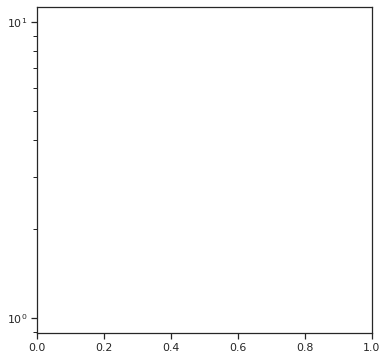

In [106]:
# boxplot of reuse_count analysis (x axis are continents and y reuse_count)
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))

ax.set_yscale('log')

total = compre_table

sns.boxplot(y = 'reuse_count', x = 'status', data = total, whis = [5, 95], width = .4, palette = 'vlag')
# sns.stripplot(y = 'norm_reuse_count', x = 'continent', data = total, size = 4, color = '.3', linewidth = 0, jitter = False)

ax.yaxis.grid(True)
ax.set(ylabel = 'Reuse Count', xlabel = '')

plt.xticks(rotation=45)
# plt.savefig(fname = '/scratch1/qiushipe/data_reusability/figures/reuse_count_boxplot.png', dpi = 300, bbox_inches = 'tight')

In [ ]:

sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))
ax.set_yscale('log')
sns.scatterplot(data = compre_table, x = 'time_public', y = 'reuse_count', palette = 'pastel')

ax.yaxis.grid(True)
ax.set(ylabel = 'secondary%', xlabel = 'GDP')
# plt.savefig(fname = '/scratch1/qiushipe/data_reusability/figures/secondary_percent_GDP.png', dpi = 300, bbox_inches = 'tight')

In [ ]:
# secondary count vs primary count
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))
ax.set_xscale('log')
ax.set_yscale('log')

# sns.scatterplot(data = total, x = 'primary_count', y = 'secondary_count', palette = 'pastel')
sns.regplot(data = total, x = 'primary_count', y = 'secondary_count', scatter_kws = {'color': 'b'})
ax.yaxis.grid(True)
ax.set(ylabel = 'Secondary Count', xlabel = 'Primary Count')
plt.savefig(fname = '/scratch1/qiushipe/data_reusability/figures/primary_secondary_count_log.png', dpi = 300, bbox_inches = 'tight')

In [ ]:
# secondary count vs primary count
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (6, 6))

sns.scatterplot(data = total, x = 'GDP', y = 'secondary%', palette = 'pastel')

ax.yaxis.grid(True)
ax.set(ylabel = 'secondary%', xlabel = 'GDP')

In [ ]:
sum(reuse_table['secondary%'] < 42.089780824220463)

In [ ]:
reuse_table

In [ ]:
sum(reuse_table['total_count'])

In [ ]:
sum(reuse_table['secondary_count'])

In [ ]:
reuse_table[reuse_table.country == 'Iran']

In [ ]:
reuse_table

In [126]:
# Map for secondary analysis rate
from pyecharts import options as opts
from pyecharts.charts import Map
def formatter(value):
    return "{:.2f}%".format(value)

Map(init_opts = opts.InitOpts(width = '1400px',height = '600px', theme = 'default'))\
.add("国家", [list(z) for z in zip(reuse_table_2_removed['country'], reuse_table_2_removed['secondary%'])], 'world', is_map_symbol_show = False)\
.set_series_opts(label_opts = opts.LabelOpts(is_show = False))\
.set_global_opts(title_opts = opts.TitleOpts(title = 'Secondary analysis rate around the world', subtitle = '', pos_left = '20%'),
                 legend_opts = opts.LegendOpts(is_show = False),
                 visualmap_opts = opts.VisualMapOpts(is_calculable = True, 
                                                     dimension = 0,
                                                     pos_left = '30', pos_top = 'center',
                                                     range_text = ['High', 'Low'],
                                                     range_color = ['#A50026', '#D73027', '#F46D43', '#F46D43', '#FDAE61', '#FFFFBF','#E0F3F8', '#ABD9E9', '#74ADD1', '#4575B4', '#313695'],
                                                     textstyle_opts = opts.TextStyleOpts(color = '#000000'),
                                                     min_ = '0', max_ = '100')).TooltipOpts(formatter=formatter).render('map_text.html')
# range_color = ['#A50026', '#D73027', '#F46D43', '#FDAE61', 'FEE090'???, '#FFFFBF', '#E0F3F8', '#ABD9E9', '#74ADD1', '#4575B4', '#313695']

AttributeError: 'Map' object has no attribute 'TooltipOpts'